In [124]:
#I guess elastic net is the best when there is grouped collinearity AND some true coeff are set to 0
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from functools import reduce  
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [2]:
p = 7
n = 1000
min_cor = 0
max_cor = 0

true_betas = np.array(np.repeat(5, p))
true_betas

array([5, 5, 5, 5, 5, 5, 5])

In [3]:
#y_noise is really needed, we can discard y_true
def get_sim_data(p, n, min_cor, max_cor, true_betas):
    
    sd_vec = np.ones(p) 
    mean = np.zeros(p)
    cor_matrix = np.zeros((p,p))

    correlation = np.random.uniform(min_cor, max_cor, int(p * (p - 1) / 2))
    cor_matrix[np.triu_indices(p, 1)] = correlation
    cor_matrix[np.tril_indices(p, -1)] = cor_matrix.T[np.tril_indices(p, -1)]
    np.fill_diagonal(cor_matrix, 1)


    D = np.diag(sd_vec)
    sigma = D.dot(cor_matrix).dot(D)

    X = np.random.multivariate_normal(mean, sigma, n)
    eps = np.random.normal(0, 1, n)
    
    y_true = X.dot(true_betas)
    y_true = pd.Series(y_true, name = 'y_true')

    y_noise = y_true + eps 
    y_noise = pd.Series(y_noise, name = 'y_noise')
    
    column_names = []
    
    for value in range(1, p + 1): 
        
        column = f"X_{value}"
        column_names.append(column)
        
    
    X = pd.DataFrame(X, columns = column_names)
    
    df = pd.concat([y_noise, X], axis = 1)
    
    return y_noise, X, df


In [4]:
y_noise, X, df = get_sim_data(p, n, min_cor, max_cor, true_betas)

In [5]:
def iterate_elnet(n, p, min_cor, max_cor, iterations_sim, true_betas, alphas, L_w):
    
    elnet_beta_names = []
    
    for value in range(1, p + 1): 
    
        column_betas = f"beta_{value}"
        elnet_beta_names.append(column_betas)

    df_list_betas_elnet = []

    for i in range(iterations_sim):
        
        true_betas_sim = true_betas
    
        y, X, df = get_sim_data(p, n, min_cor, max_cor, true_betas_sim)
        matr_beta = []
        
        #for L_w in L_weight:
    
        for a in alphas: 
        
            elnet_model = ElasticNet(alpha=a, l1_ratio=L_w).fit(X,y)
            elnet_beta = np.array(elnet_model.coef_)
            matr_beta.append(elnet_beta)
            df_elnet_betas = pd.DataFrame(matr_beta, columns = elnet_beta_names)
        
         
        df_list_betas_elnet.append(df_elnet_betas)
        
    return df_list_betas_elnet

In [6]:
np.random.seed(200)

p_regressors = [2, 28, 30, 35]
n = 30
min_cor = 0 
max_cor = 0 
iterations = 1
n_alphas = 100
alphas = np.logspace(-11, 4, n_alphas)
L_weight = [0.2,0.5,0.7]

collect_elnet_betas = []

for L_w in L_weight:
    for p in p_regressors: 
    
        elnet_betas = iterate_elnet(n, p, min_cor, max_cor, iterations, np.repeat(5, p), alphas, L_w)
        collect_elnet_betas.append(elnet_betas)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.130716139386558, tolerance: 2.1291469583246787
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8867063205068573, tolerance: 2.1291469583246787
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.875026928415707, tolerance: 2.1291469583246787
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

In [7]:
collect_elnet_betas[1][0]
#[0] is the case when L_weigth=0.2 and p=2
#[1] is the case when L_weigth=0.2 and p=28
#[2] is the case when L_weigth=0.2 and p=30
#[3] is the case when L_weigth=0.2 and p=35
#[4] is the case when L_weigth=0.5 and p=2
#...and so on...

beta_1    beta_2    beta_3    beta_4    beta_5    beta_6    beta_7  \
0   4.890179  6.094881  5.303294  7.429461  5.113061  5.487173  6.365282   
1   4.890179  6.094881  5.303294  7.429461  5.113061  5.487173  6.365282   
2   4.890179  6.094881  5.303294  7.429461  5.113061  5.487173  6.365282   
3   4.890179  6.094881  5.303294  7.429461  5.113061  5.487173  6.365282   
4   4.890179  6.094881  5.303294  7.429461  5.113061  5.487173  6.365282   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
96  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
97  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
98  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
99  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      beta_8    beta_9   beta_10  ...   beta_19   beta_20   beta_21   beta_22  \
0   5.742975  2.377382  5.177202  ...  5.670527  5.890435  3.904383  6.127151   
1   5.742975  2.377382  5.177202  ...  5.670527  5.890435  3.904383  6.127151   
2   5.742975  2.377382  5.177202  ...  5.670527  5.890435  3.904383  6.127151   
3   5.742975  2.377382  5.177202  ...  5.670527  5.890435  3.904383  6.127151   
4   5.742974  2.377382  5.177202  ...  5.670527  5.890435  3.904383  6.127151   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
96  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
97  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
98  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
99  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

     beta_23   beta_24  beta_25   beta_26   beta_27   beta_28  
0   4.967807  4.184074  6.43429  4.116504  6.817064  5.652145  
1   4.967807  4.184074  6.43429  4.116504  6.817064  5.652145  
2   4.967807  4.184074  6.43429  4.116504  6.817064  5.652145  
3   4.967807  4.184074  6.43429  4.116504  6.817064  5.652145  
4   4.967807  4.184074  6.43429  4.116504  6.817064  5.652145  
..       ...       ...      ...       ...       ...       ...  
95  0.000000  0.000000 -0.00000  0.000000  0.000000 -0.000000  
96  0.000000  0.000000 -0.00000  0.000000  0.000000 -0.000000  
97  0.000000  0.000000 -0.00000  0.000000  0.000000 -0.000000  
98  0.000000  0.000000 -0.00000  0.000000  0.000000 -0.000000  
99  0.000000  0.000000 -0.00000  0.000000  0.000000 -0.000000  

[100 rows x 28 columns]

In [8]:
def plot_elnet_regression(alphas, elnet_betas): 

    ax = plt.gca()
    
    ax.plot(alphas, elnet_betas)
    
    ax.set_xscale("log")
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.rcParams["figure.figsize"] = (50,20)
    plt.xlabel("alpha", fontsize = 30)
    plt.ylabel("weights", fontsize = 30)
    
    ax.tick_params(axis='both', which='major', labelsize=25)

    plt.title("Elastic Net coefficients as a function of the regularization", fontsize = 35)
    plt.axis("tight")
    plt.show()

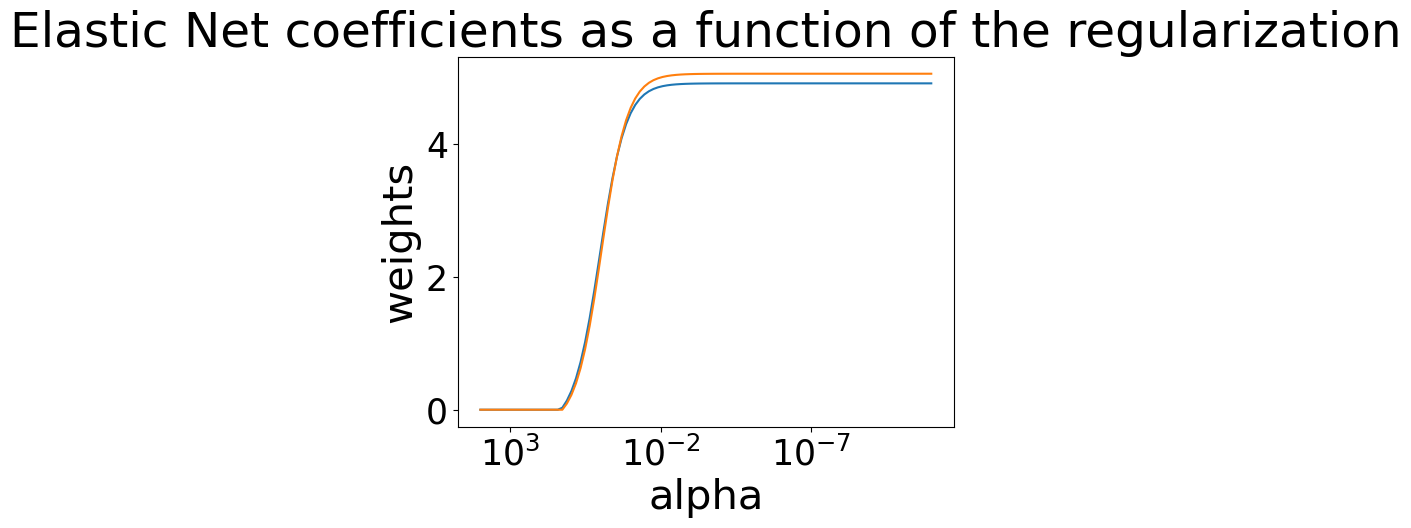

In [9]:
plot_elnet_regression(alphas, collect_elnet_betas[0][0])

In [41]:
def plot_mean_shrinkaged_estimates(data, title):
    ax = plt.gca()

    ax.plot(alphas, data)
    ax.set_xscale("log")
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.rcParams["figure.figsize"] = (30,20)
    plt.xlabel("alpha", fontsize = 30)
    plt.ylabel("weights", fontsize = 30)
    ax.tick_params(axis='both', which='major', labelsize=25)
    plt.axhline(y=0, color='black', linestyle='--')

    plt.title(title, fontsize = 35)
    plt.axis("tight")
    plt.show()

In [11]:
np.random.seed(159)

n = 30
min_cor = 0 
max_cor = 0 
iterations_sim = 10
intermediate_results = []
mean_df_list_betas_elnet_2 = []
for i,L_w in enumerate(L_weight):
    df_list_betas_elnet_2 = iterate_elnet(n, 2, min_cor, max_cor, iterations_sim, np.repeat(5, 2), alphas,L_w)
    intermediate_results.append(df_list_betas_elnet_2)
    
    mean_df_list_betas = reduce(lambda x, y: x.add(y, fill_value = 0), intermediate_results[i]) / iterations_sim
    mean_df_list_betas_elnet_2.append(mean_df_list_betas)

    mean_df_list_betas_elnet_2[i]["alpha"] = alphas
    mean_df_list_betas_elnet_2[i].set_index("alpha", inplace = True)
mean_df_list_betas_elnet_2


[                beta_1    beta_2
 alpha                           
 1.000000e-11  5.070161  4.838801
 1.417474e-11  5.070161  4.838801
 2.009233e-11  5.070161  4.838801
 2.848036e-11  5.070161  4.838801
 4.037017e-11  5.070161  4.838801
 ...                ...       ...
 2.477076e+03  0.000000  0.000000
 3.511192e+03  0.000000  0.000000
 4.977024e+03  0.000000  0.000000
 7.054802e+03  0.000000  0.000000
 1.000000e+04  0.000000  0.000000
 
 [100 rows x 2 columns],
                 beta_1    beta_2
 alpha                           
 1.000000e-11  5.075246  4.988535
 1.417474e-11  5.075246  4.988535
 2.009233e-11  5.075246  4.988535
 2.848036e-11  5.075246  4.988535
 4.037017e-11  5.075246  4.988535
 ...                ...       ...
 2.477076e+03  0.000000  0.000000
 3.511192e+03  0.000000  0.000000
 4.977024e+03  0.000000  0.000000
 7.054802e+03  0.000000  0.000000
 1.000000e+04  0.000000  0.000000
 
 [100 rows x 2 columns],
                 beta_1   beta_2
 alpha                       

In [12]:
mean_df_list_betas_elnet_2[0] #for L_weight=0.2
#mean_df_list_betas_elnet_2[1] for L_weight=0.5
#mean_df_list_betas_elnet_2[2] for L_weight=0.7

beta_1    beta_2
alpha                           
1.000000e-11  5.070161  4.838801
1.417474e-11  5.070161  4.838801
2.009233e-11  5.070161  4.838801
2.848036e-11  5.070161  4.838801
4.037017e-11  5.070161  4.838801
...                ...       ...
2.477076e+03  0.000000  0.000000
3.511192e+03  0.000000  0.000000
4.977024e+03  0.000000  0.000000
7.054802e+03  0.000000  0.000000
1.000000e+04  0.000000  0.000000

[100 rows x 2 columns]

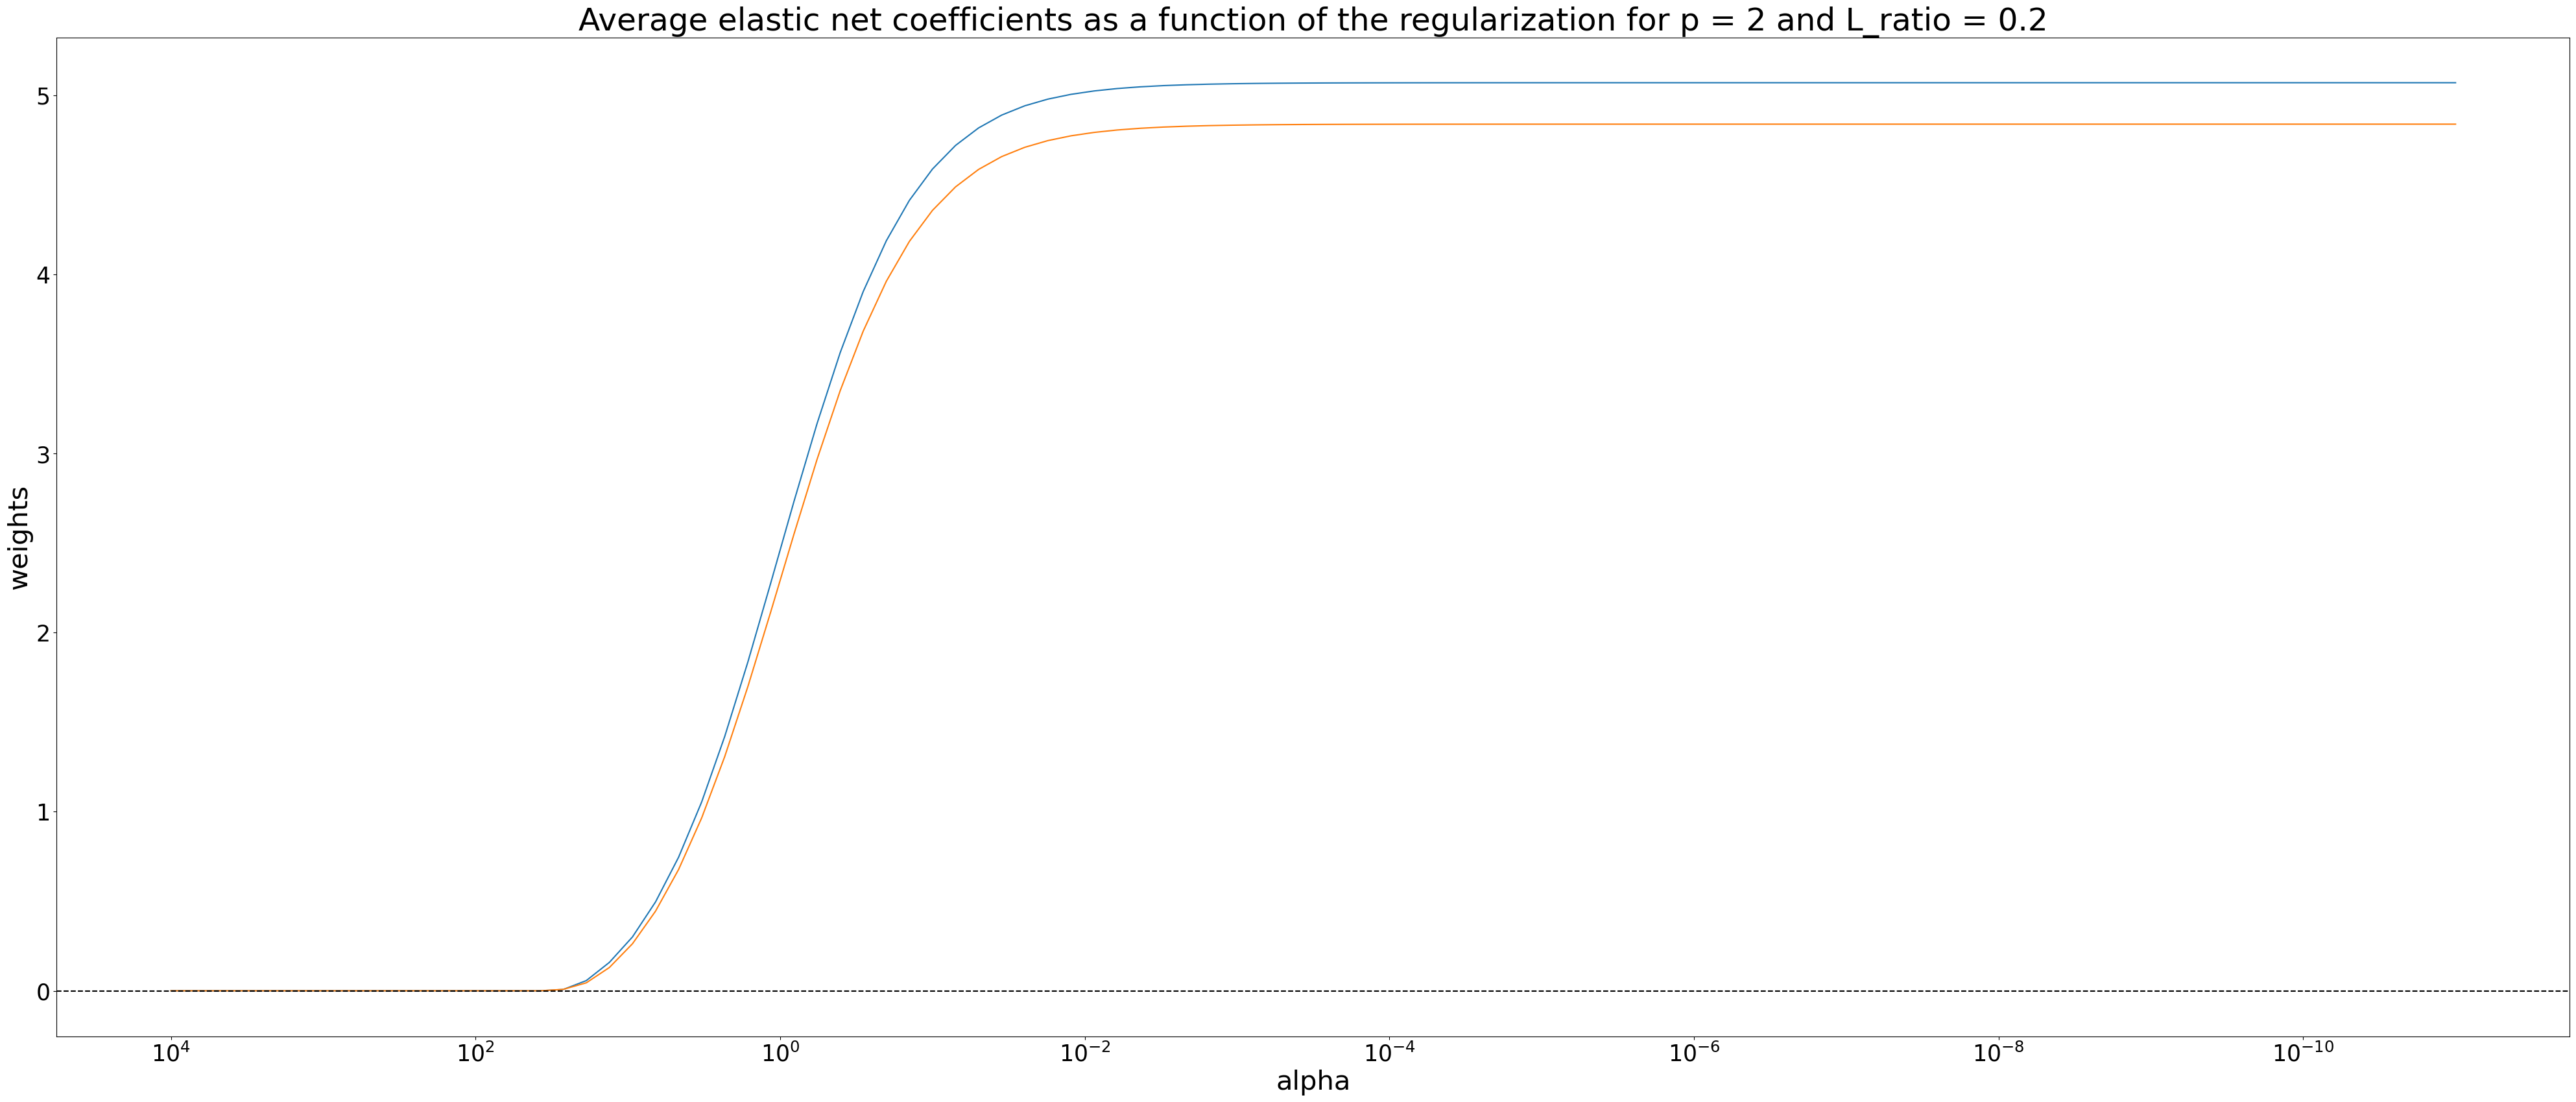

In [13]:
plot_mean_shrinkaged_estimates(mean_df_list_betas_elnet_2[0], "Average elastic net coefficients as a function of the regularization for p = 2 and L_ratio = 0.2")

In [14]:
np.random.seed(160)

n = 30
min_cor = 0 
max_cor = 0 
iterations_sim = 10
intermediate_results = []
mean_df_list_betas_elnet_28 = []
for i,L_w in enumerate(L_weight):
    df_list_betas_elnet_28 = iterate_elnet(n, 28, min_cor, max_cor, iterations_sim, np.repeat(5, 28), alphas,L_w)
    intermediate_results.append(df_list_betas_elnet_28)
    
    mean_df_list_betas = reduce(lambda x, y: x.add(y, fill_value = 0), intermediate_results[i]) / iterations_sim
    mean_df_list_betas_elnet_28.append(mean_df_list_betas)

    mean_df_list_betas_elnet_28[i]["alpha"] = alphas
    mean_df_list_betas_elnet_28[i].set_index("alpha", inplace = True)
mean_df_list_betas_elnet_28


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4731814710397226, tolerance: 1.9267906361105693
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.472951342825896, tolerance: 1.9267906361105693
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.472625123574491, tolerance: 1.9267906361105693
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7980824947996044, tolerance: 1.4829841901258296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7980824534060313, tolerance: 1.4829841901258296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.798082394731723, tolerance: 1.4829841901258296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7963515304062307, tolerance: 1.4829841901258296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7956298334232985, tolerance: 1.4829841901258296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7946078311391471, tolerance: 1.4829841901258296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1272731698130114, tolerance: 1.1262609980688854
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.127260026396702, tolerance: 1.1262609980688854
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.127241396352202, tolerance: 1.1262609980688854
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

[                beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
 alpha                                                                      
 1.000000e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
 1.417474e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
 2.009233e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
 2.848036e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
 4.037017e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
 ...                ...       ...       ...       ...       ...       ...   
 2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

In [15]:
mean_df_list_betas_elnet_28[0] #for L_weight=0.2
#mean_df_list_betas_elnet_28[1] for L_weight=0.5
#mean_df_list_betas_elnet_28[2] for L_weight=0.7

beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
alpha                                                                      
1.000000e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
1.417474e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
2.009233e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
2.848036e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
4.037017e-11  5.099822  5.135368  5.087636  5.251821  4.999428  4.975634   
...                ...       ...       ...       ...       ...       ...   
2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               beta_7    beta_8    beta_9   beta_10  ...   beta_19   beta_20  \
alpha                                                ...                       
1.000000e-11  5.15097  4.835523  5.215796  5.096603  ...  5.128606  5.059314   
1.417474e-11  5.15097  4.835523  5.215796  5.096603  ...  5.128606  5.059314   
2.009233e-11  5.15097  4.835523  5.215796  5.096603  ...  5.128606  5.059314   
2.848036e-11  5.15097  4.835523  5.215796  5.096603  ...  5.128606  5.059314   
4.037017e-11  5.15097  4.835523  5.215796  5.096603  ...  5.128606  5.059314   
...               ...       ...       ...       ...  ...       ...       ...   
2.477076e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3.511192e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
4.977024e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
7.054802e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1.000000e+04  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

               beta_21   beta_22   beta_23   beta_24  beta_25   beta_26  \
alpha                                                                     
1.000000e-11  4.795537  4.980261  5.010759  5.006048  4.71517  4.906597   
1.417474e-11  4.795537  4.980261  5.010759  5.006048  4.71517  4.906597   
2.009233e-11  4.795537  4.980261  5.010759  5.006048  4.71517  4.906597   
2.848036e-11  4.795537  4.980261  5.010759  5.006048  4.71517  4.906597   
4.037017e-11  4.795537  4.980261  5.010759  5.006048  4.71517  4.906597   
...                ...       ...       ...       ...      ...       ...   
2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   

               beta_27   beta_28  
alpha                             
1.000000e-11  5.022085  4.916903  
1.417474e-11  5.022085  4.916903  
2.009233e-11  5.022085  4.916903  
2.848036e-11  5.022085  4.916903  
4.037017e-11  5.022085  4.916903  
...                ...       ...  
2.477076e+03  0.000000  0.000000  
3.511192e+03  0.000000  0.000000  
4.977024e+03  0.000000  0.000000  
7.054802e+03  0.000000  0.000000  
1.000000e+04  0.000000  0.000000  

[100 rows x 28 columns]

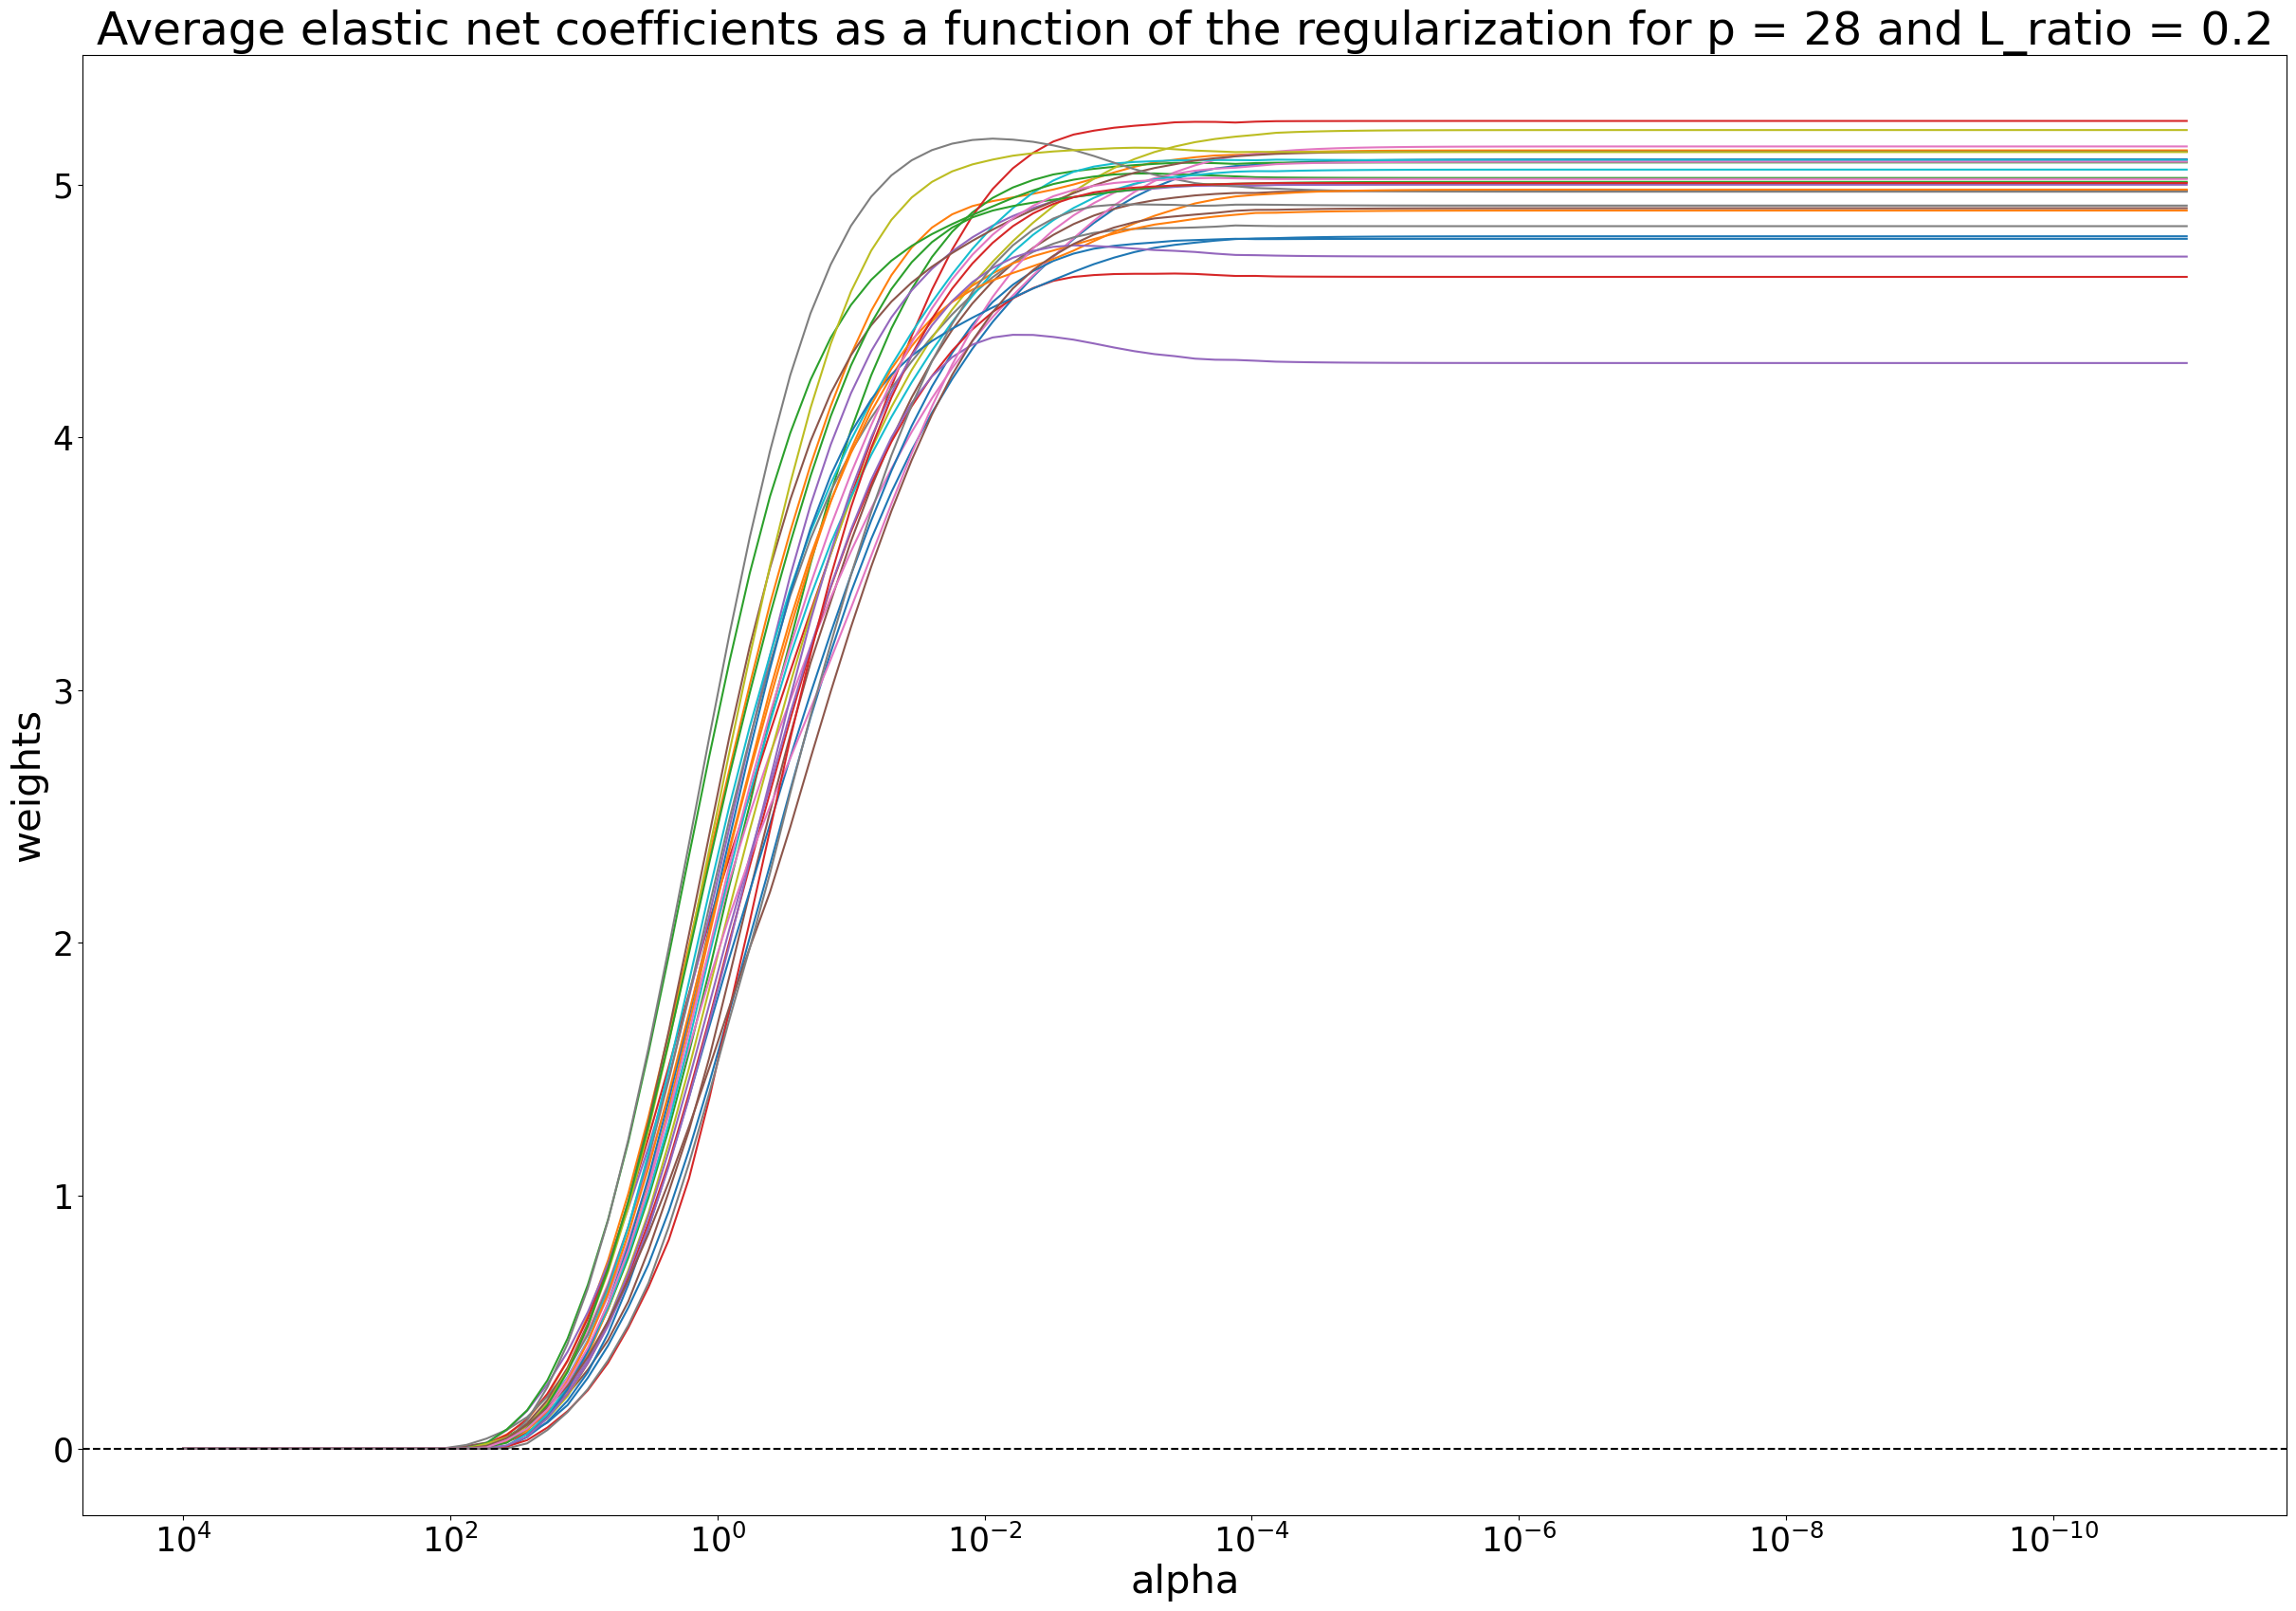

In [16]:
plot_mean_shrinkaged_estimates(mean_df_list_betas_elnet_28[0], "Average elastic net coefficients as a function of the regularization for p = 28 and L_ratio = 0.2")

In [17]:
np.random.seed(162)

n = 30
min_cor = 0 
max_cor = 0 
iterations_sim = 10
intermediate_results = []
mean_df_list_betas_elnet_30 = []
for i,L_w in enumerate(L_weight):
    df_list_betas_elnet_30 = iterate_elnet(n, 30, min_cor, max_cor, iterations_sim, np.repeat(5, 30), alphas,L_w)
    intermediate_results.append(df_list_betas_elnet_30)
    
    mean_df_list_betas = reduce(lambda x, y: x.add(y, fill_value = 0), intermediate_results[i]) / iterations_sim
    mean_df_list_betas_elnet_30.append(mean_df_list_betas)

    mean_df_list_betas_elnet_30[i]["alpha"] = alphas
    mean_df_list_betas_elnet_30[i].set_index("alpha", inplace = True)
mean_df_list_betas_elnet_30

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.112225186062321, tolerance: 1.8835647729105667
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.831868764400035, tolerance: 1.8835647729105667
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7328905878506635, tolerance: 1.8835647729105667
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2166453550523473, tolerance: 0.9932742172994476
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5851595227141249, tolerance: 0.9932742172994476
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.029397106766643, tolerance: 0.9932742172994476
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9633596574409022, tolerance: 1.747565075674094
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4646117163495957, tolerance: 1.747565075674094
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9141937293323044, tolerance: 1.747565075674094
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

[                beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
 alpha                                                                      
 1.000000e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
 1.417474e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
 2.009233e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
 2.848036e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
 4.037017e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
 ...                ...       ...       ...       ...       ...       ...   
 2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

In [18]:
mean_df_list_betas_elnet_30[0] #for L_weight=0.2
#mean_df_list_betas_elnet_30[1] for L_weight=0.5
#mean_df_list_betas_elnet_30[2] for L_weight=0.7

beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
alpha                                                                      
1.000000e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
1.417474e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
2.009233e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
2.848036e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
4.037017e-11  5.153667  3.562362  4.080161  5.254713  5.052212  4.370302   
...                ...       ...       ...       ...       ...       ...   
2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               beta_7    beta_8    beta_9   beta_10  ...   beta_21   beta_22  \
alpha                                                ...                       
1.000000e-11  4.37855  4.875194  4.762926  4.472731  ...  4.062442  4.640209   
1.417474e-11  4.37855  4.875194  4.762926  4.472731  ...  4.062442  4.640209   
2.009233e-11  4.37855  4.875194  4.762926  4.472731  ...  4.062442  4.640209   
2.848036e-11  4.37855  4.875194  4.762926  4.472731  ...  4.062442  4.640209   
4.037017e-11  4.37855  4.875194  4.762926  4.472731  ...  4.062442  4.640209   
...               ...       ...       ...       ...  ...       ...       ...   
2.477076e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3.511192e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
4.977024e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
7.054802e+03  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1.000000e+04  0.00000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

               beta_23   beta_24   beta_25   beta_26   beta_27   beta_28  \
alpha                                                                      
1.000000e-11  5.190723  4.179623  3.939919  4.000987  3.868596  4.572626   
1.417474e-11  5.190723  4.179623  3.939919  4.000987  3.868596  4.572626   
2.009233e-11  5.190723  4.179623  3.939919  4.000987  3.868596  4.572626   
2.848036e-11  5.190723  4.179623  3.939919  4.000987  3.868596  4.572626   
4.037017e-11  5.190723  4.179623  3.939919  4.000987  3.868596  4.572626   
...                ...       ...       ...       ...       ...       ...   
2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               beta_29   beta_30  
alpha                             
1.000000e-11  4.744268  5.225912  
1.417474e-11  4.744268  5.225912  
2.009233e-11  4.744268  5.225912  
2.848036e-11  4.744268  5.225912  
4.037017e-11  4.744268  5.225912  
...                ...       ...  
2.477076e+03  0.000000  0.000000  
3.511192e+03  0.000000  0.000000  
4.977024e+03  0.000000  0.000000  
7.054802e+03  0.000000  0.000000  
1.000000e+04  0.000000  0.000000  

[100 rows x 30 columns]

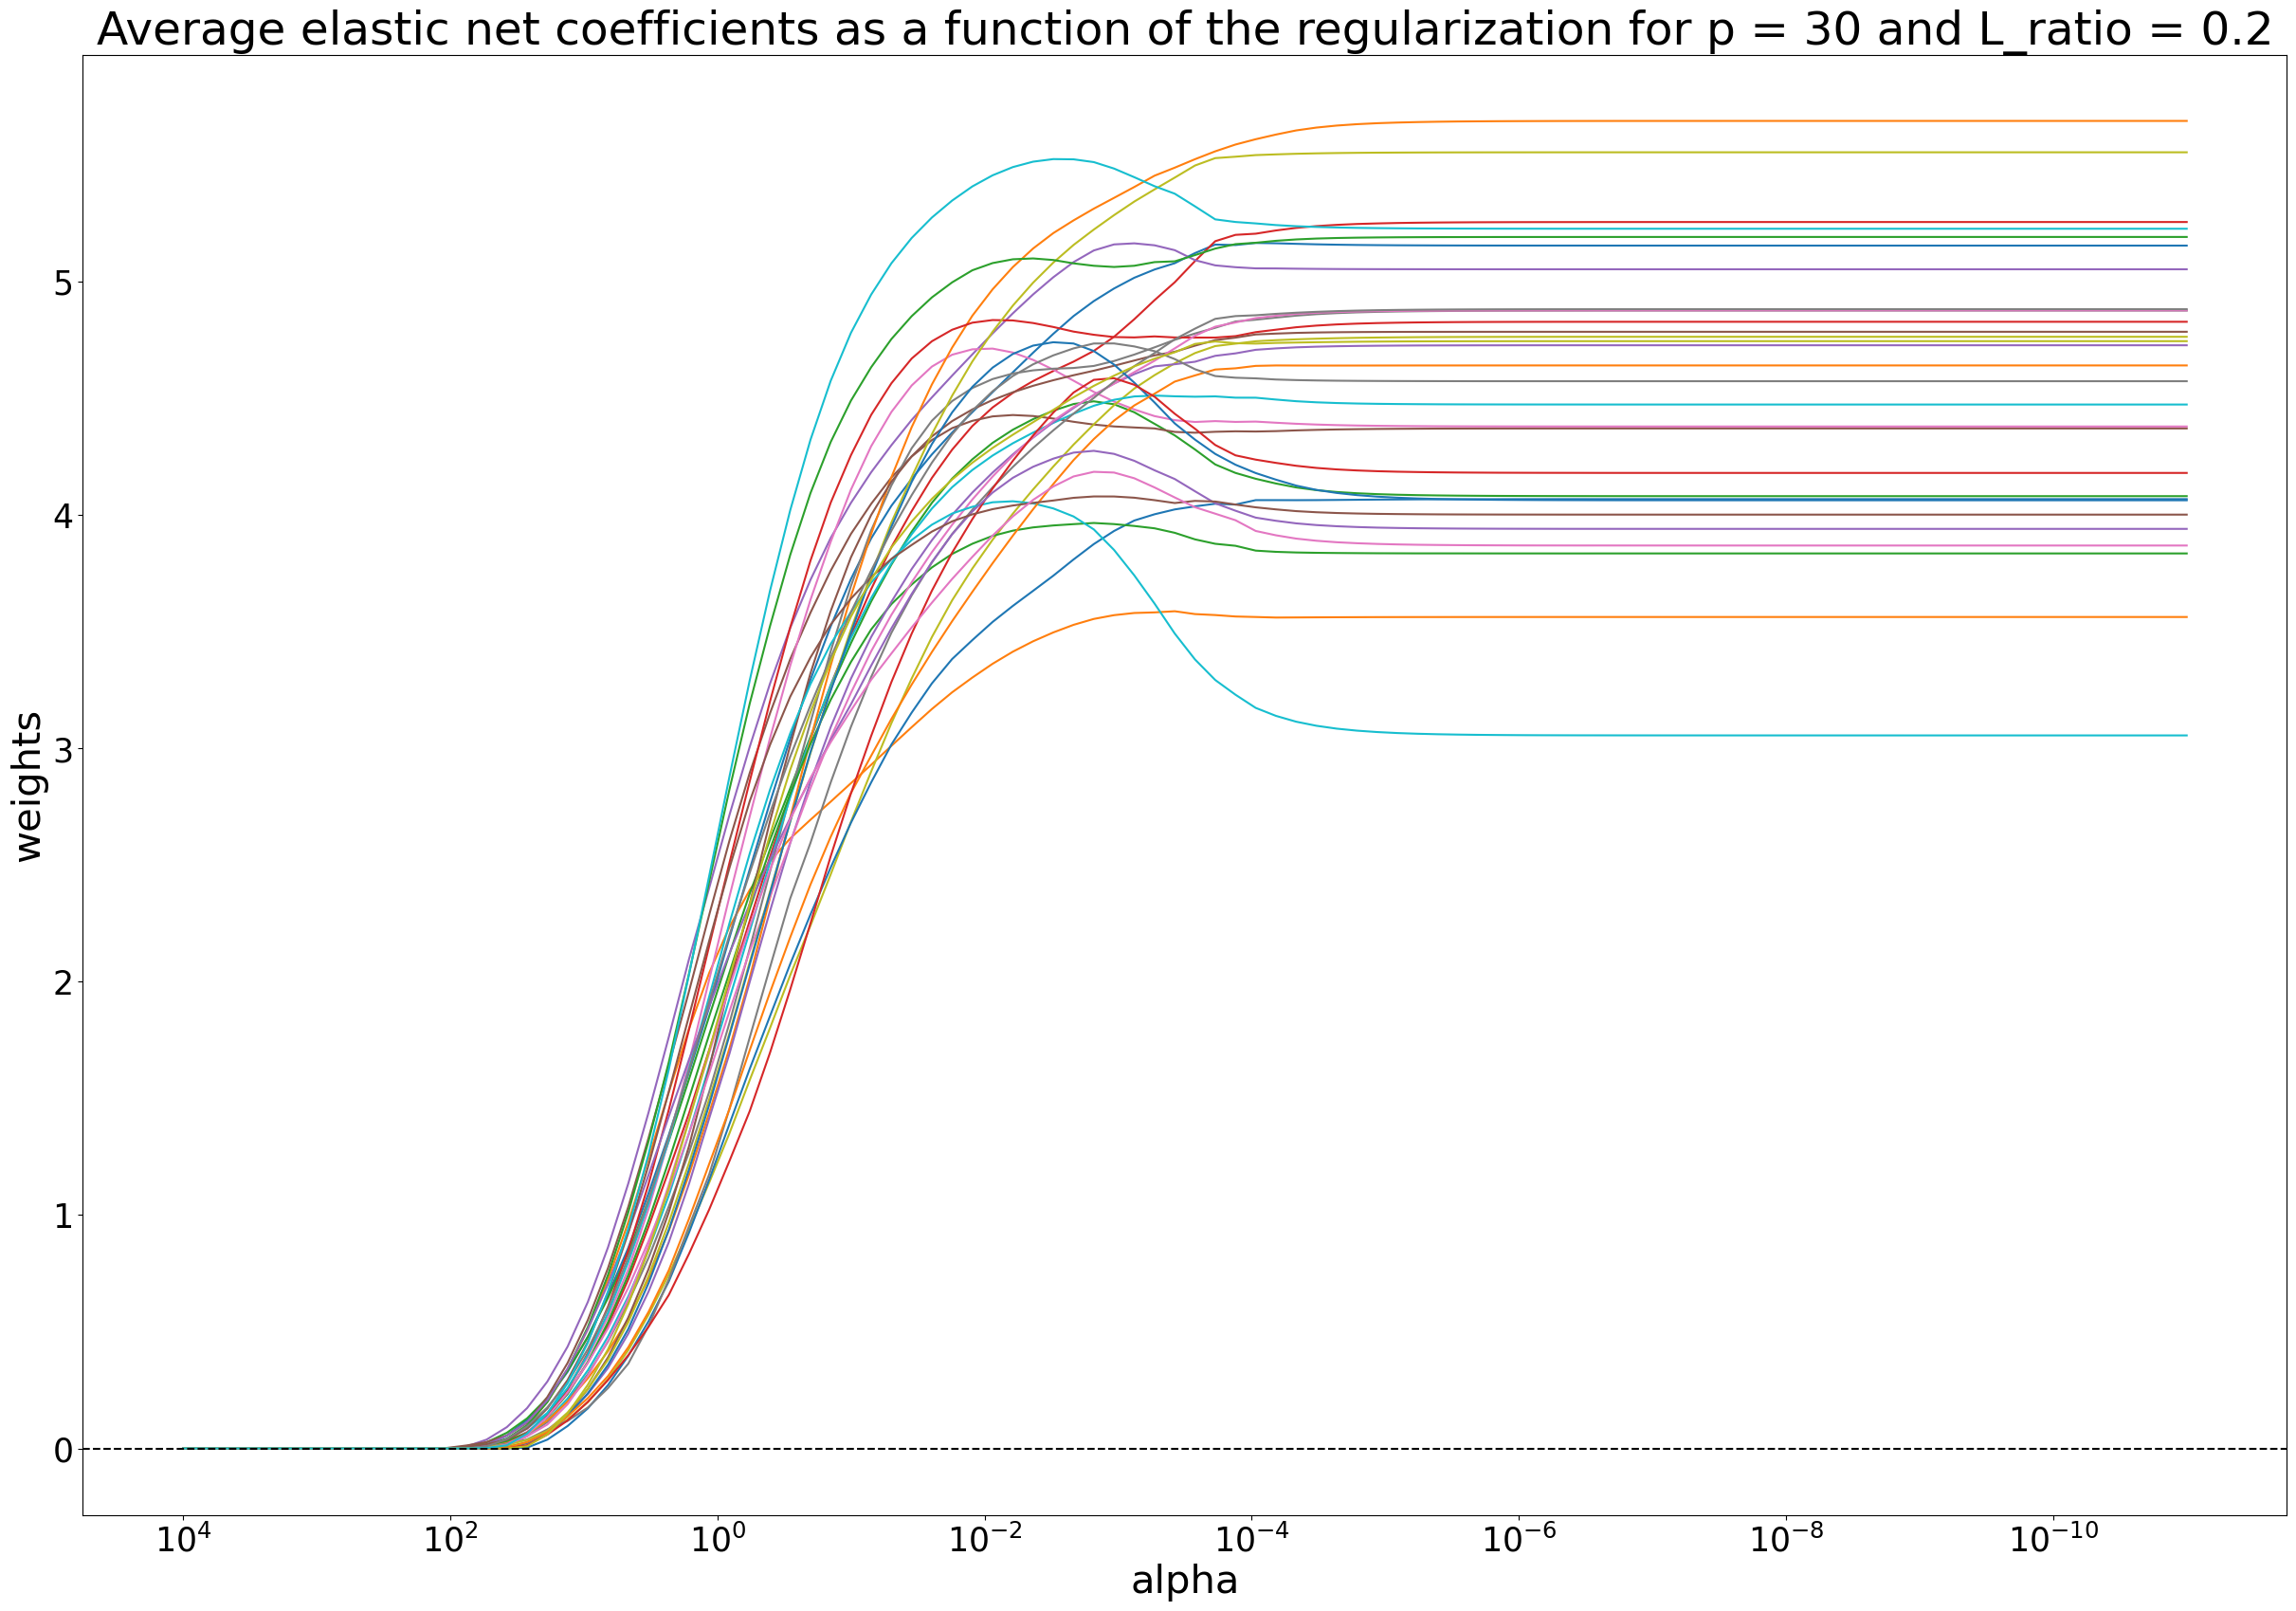

In [19]:
plot_mean_shrinkaged_estimates(mean_df_list_betas_elnet_30[0], "Average elastic net coefficients as a function of the regularization for p = 30 and L_ratio = 0.2")

In [20]:
np.random.seed(161)

n = 30
min_cor = 0 
max_cor = 0 
iterations_sim = 10
intermediate_results = []
mean_df_list_betas_elnet_35 = []
for i,L_w in enumerate(L_weight):
    df_list_betas_elnet_35 = iterate_elnet(n, 35, min_cor, max_cor, iterations_sim, np.repeat(5, 35), alphas,L_w)
    intermediate_results.append(df_list_betas_elnet_35)
    
    mean_df_list_betas = reduce(lambda x, y: x.add(y, fill_value = 0), intermediate_results[i]) / iterations_sim
    mean_df_list_betas_elnet_35.append(mean_df_list_betas)

    mean_df_list_betas_elnet_35[i]["alpha"] = alphas
    mean_df_list_betas_elnet_35[i].set_index("alpha", inplace = True)
mean_df_list_betas_elnet_35

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.842659958245358, tolerance: 2.5913447875658453
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.76404859169609, tolerance: 2.5913447875658453
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.745593034257373, tolerance: 2.5913447875658453
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3715909821595447, tolerance: 2.660845596005399
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.504532766052953, tolerance: 2.660845596005399
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.8952120685505225, tolerance: 2.660845596005399
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.521305594118193, tolerance: 2.8800834946978933
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.38281539249652, tolerance: 2.8800834946978933
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.697034913207636, tolerance: 2.8800834946978933
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.958228941330798, tolerance: 2.448462504181932
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.552547816434728, tolerance: 2.448462504181932
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7050801757498744, tolerance: 2.448462504181932
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.146183755750647, tolerance: 2.8134304791082556
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.110201783278423, tolerance: 2.8134304791082556
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7435888951327967, tolerance: 2.6228738858818637
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.057968829494, tolerance: 2.9580511492646955
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8217462401756124, tolerance: 2.9580511492646955
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.44691910928965, tolerance: 2.9580511492646955
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

[                beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
 alpha                                                                      
 1.000000e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
 1.417474e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
 2.009233e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
 2.848036e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
 4.037017e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
 ...                ...       ...       ...       ...       ...       ...   
 2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

In [21]:
mean_df_list_betas_elnet_35[0] #for L_weight=0.2
#mean_df_list_betas_elnet_35[1] for L_weight=0.5
#mean_df_list_betas_elnet_35[2] for L_weight=0.7

beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
alpha                                                                      
1.000000e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
1.417474e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
2.009233e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
2.848036e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
4.037017e-11  4.184902  5.163825  3.788625  6.459274  4.103123  5.520304   
...                ...       ...       ...       ...       ...       ...   
2.477076e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3.511192e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4.977024e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7.054802e+03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.000000e+04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                beta_7    beta_8    beta_9   beta_10  ...   beta_26  beta_27  \
alpha                                                 ...                      
1.000000e-11  4.734586  4.861269  2.912782  4.188703  ...  4.396723  3.90498   
1.417474e-11  4.734586  4.861269  2.912782  4.188703  ...  4.396723  3.90498   
2.009233e-11  4.734586  4.861269  2.912782  4.188703  ...  4.396723  3.90498   
2.848036e-11  4.734586  4.861269  2.912782  4.188703  ...  4.396723  3.90498   
4.037017e-11  4.734586  4.861269  2.912782  4.188703  ...  4.396723  3.90498   
...                ...       ...       ...       ...  ...       ...      ...   
2.477076e+03  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00000   
3.511192e+03  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00000   
4.977024e+03  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00000   
7.054802e+03  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00000   
1.000000e+04  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.00000   

               beta_28   beta_29   beta_30  beta_31   beta_32   beta_33  \
alpha                                                                     
1.000000e-11  3.475903  2.597603  2.798908  2.44262  2.005953  1.554628   
1.417474e-11  3.475903  2.597603  2.798908  2.44262  2.005953  1.554628   
2.009233e-11  3.475903  2.597603  2.798908  2.44262  2.005953  1.554628   
2.848036e-11  3.475903  2.597603  2.798908  2.44262  2.005953  1.554628   
4.037017e-11  3.475903  2.597603  2.798908  2.44262  2.005953  1.554628   
...                ...       ...       ...      ...       ...       ...   
2.477076e+03  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
3.511192e+03  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
4.977024e+03  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
7.054802e+03  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
1.000000e+04  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

               beta_34  beta_35  
alpha                            
1.000000e-11  3.409324  4.36429  
1.417474e-11  3.409324  4.36429  
2.009233e-11  3.409324  4.36429  
2.848036e-11  3.409324  4.36429  
4.037017e-11  3.409324  4.36429  
...                ...      ...  
2.477076e+03  0.000000  0.00000  
3.511192e+03  0.000000  0.00000  
4.977024e+03  0.000000  0.00000  
7.054802e+03  0.000000  0.00000  
1.000000e+04  0.000000  0.00000  

[100 rows x 35 columns]

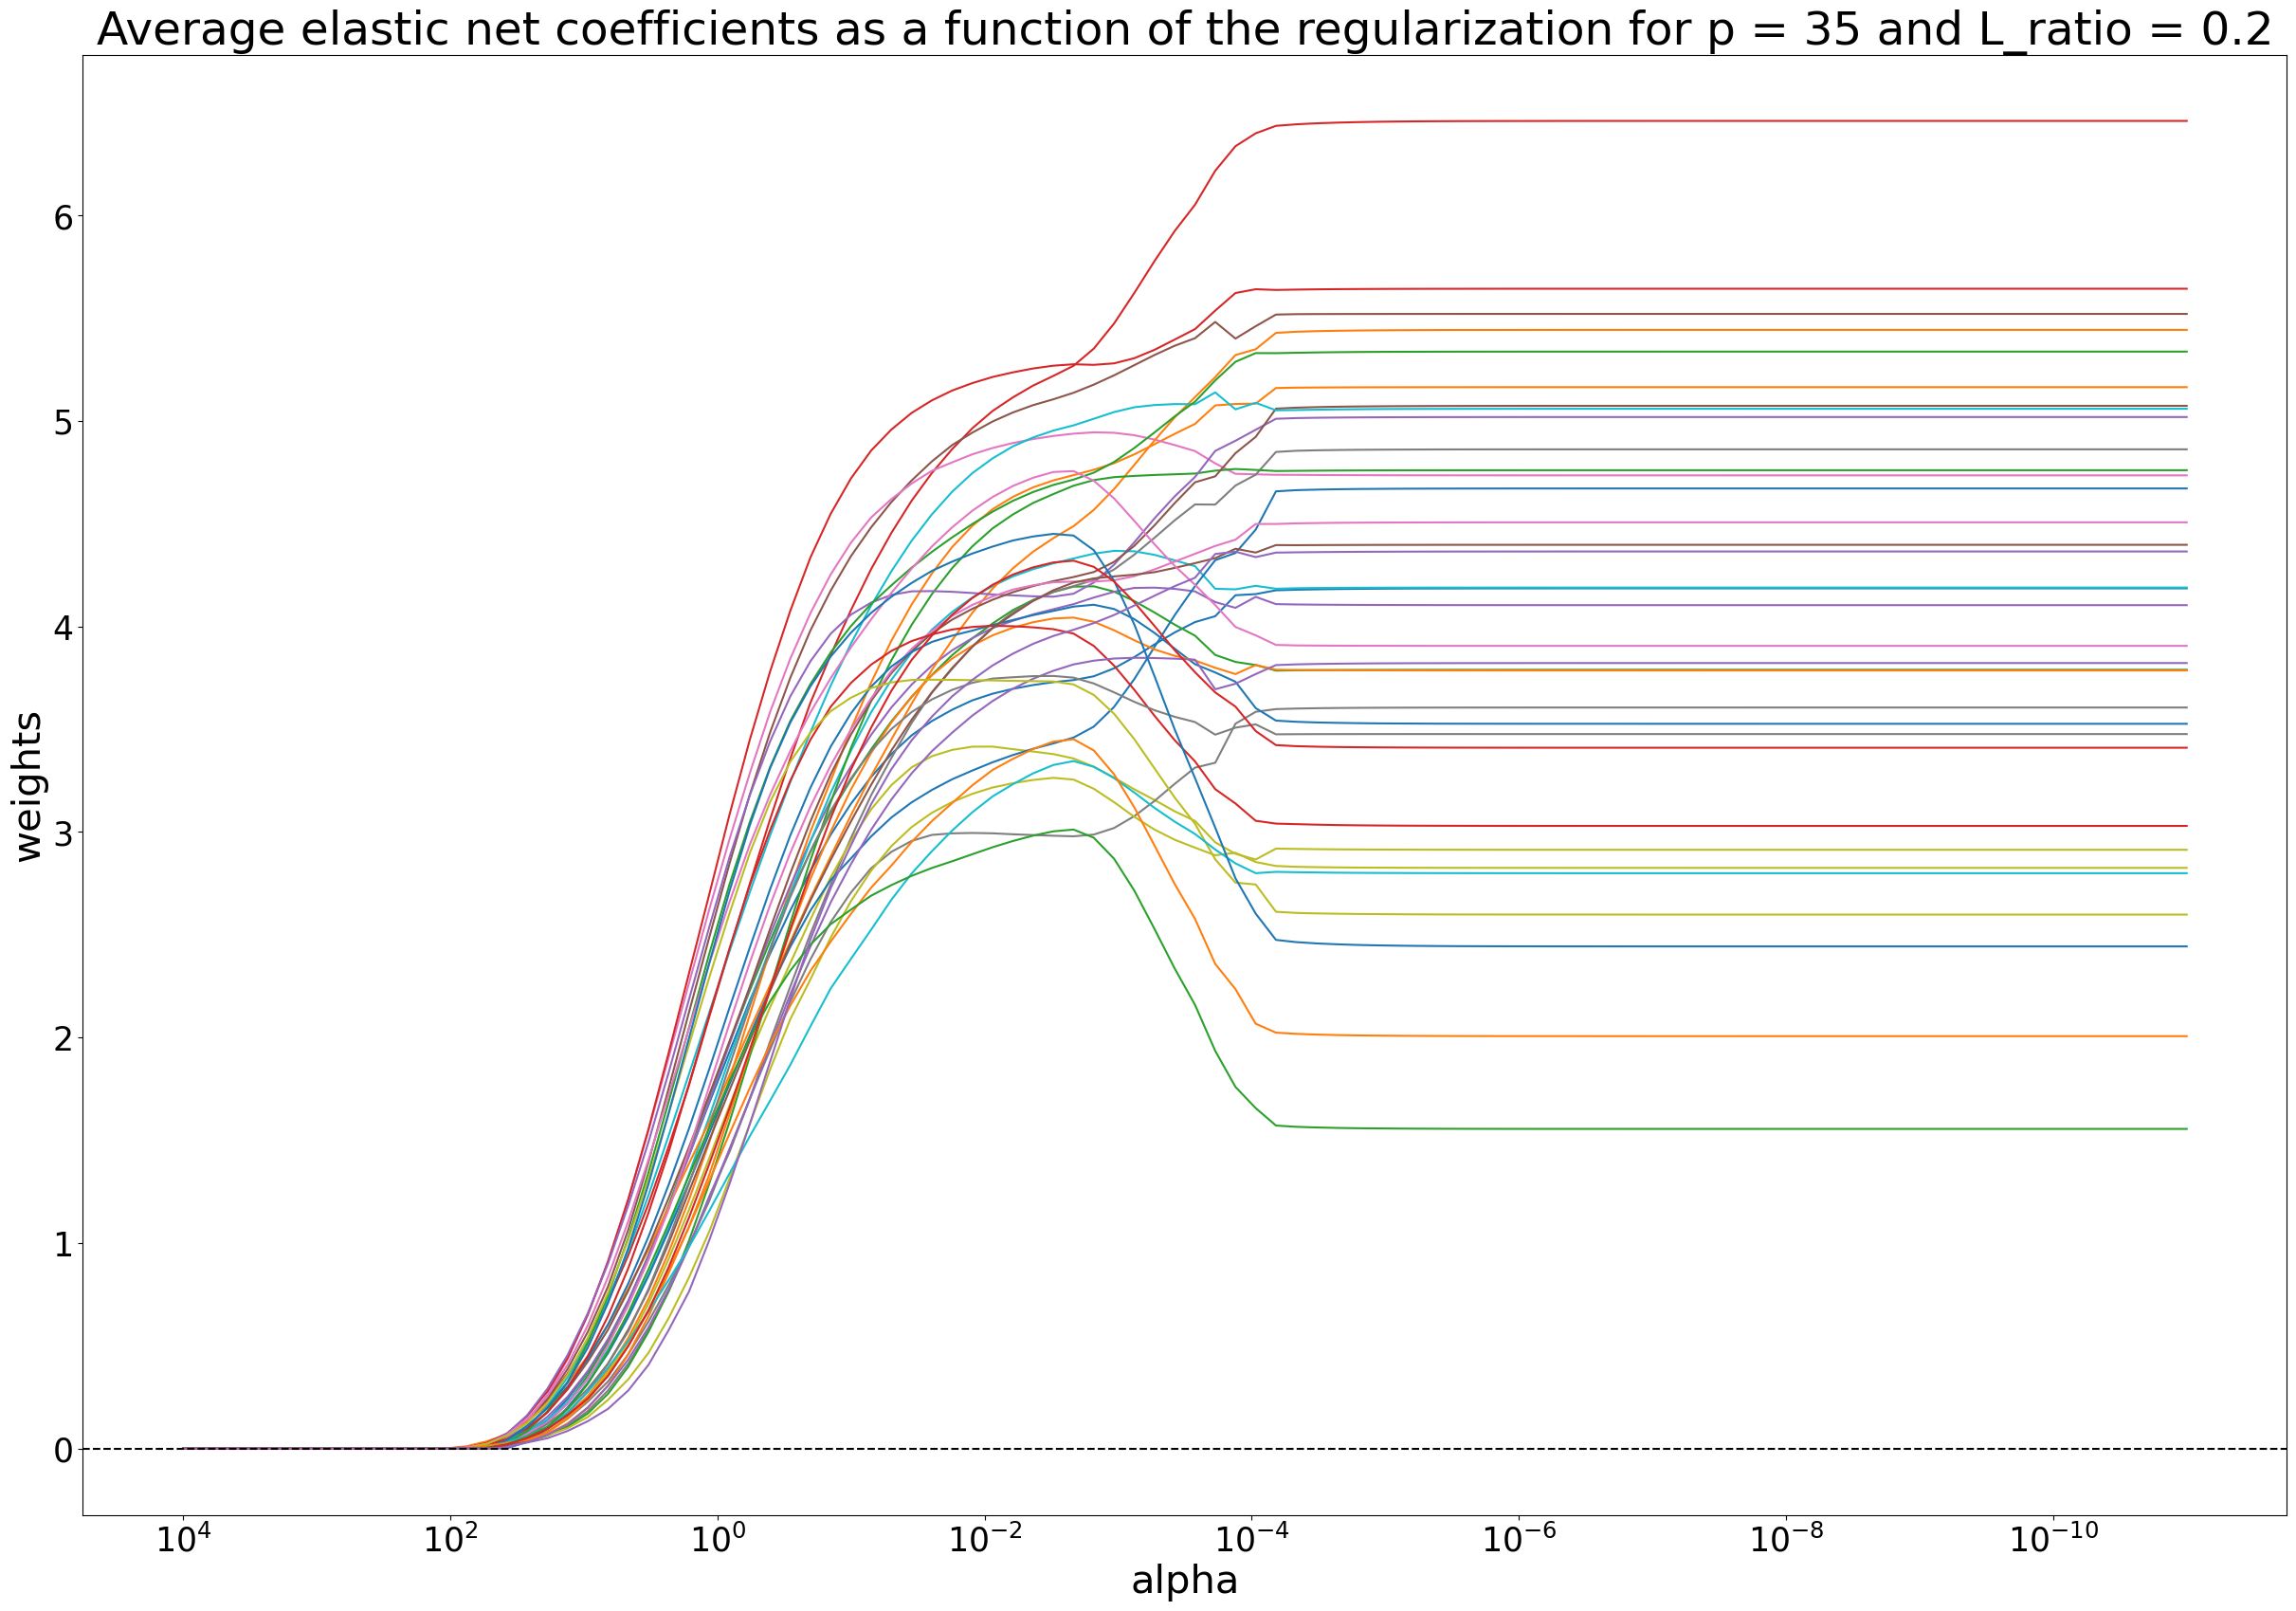

In [22]:
plot_mean_shrinkaged_estimates(mean_df_list_betas_elnet_35[0], "Average elastic net coefficients as a function of the regularization for p = 35 and L_ratio = 0.2")

In [23]:
dfs_try_02 = [mean_df_list_betas_elnet_2[0], mean_df_list_betas_elnet_28[0], mean_df_list_betas_elnet_30[0], mean_df_list_betas_elnet_35[0]]
dfs_try_05 = [mean_df_list_betas_elnet_2[1], mean_df_list_betas_elnet_28[1], mean_df_list_betas_elnet_30[1], mean_df_list_betas_elnet_35[1]]
dfs_try_07 = [mean_df_list_betas_elnet_2[2], mean_df_list_betas_elnet_28[2], mean_df_list_betas_elnet_30[2], mean_df_list_betas_elnet_35[2]]

In [24]:
def plot_average_betas(dfs, alphas, L_w, reg_type):

    plt.figure(figsize = (40, 25))
    count = 1

    for i, a in zip(dfs, alphas):
        plt.subplot(2, 2, count)
    
        ax = plt.gca()
    
        ax.plot(a, i)
    
        ax.set_xscale("log")
        ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    
        plt.xlabel("alpha", fontsize = 25)
        plt.ylabel("weights", fontsize = 25)
    
        ax.tick_params(axis='both', which='major', labelsize = 20)
        ax.set_ylim([0, 6])
        
        if reg_type == "Average elastic net":
            plt.title(f"{reg_type} coefficients as a function of $\lambda$, p = {i.shape[1]}, L_ratio = {L_w} ", fontsize = 28)
        else:
            plt.title(f"{reg_type} coefficients as a function of $\lambda$, p = {i.shape[1]} ", fontsize = 28)
        plt.axis("tight")
        count += 1
        plt.show()

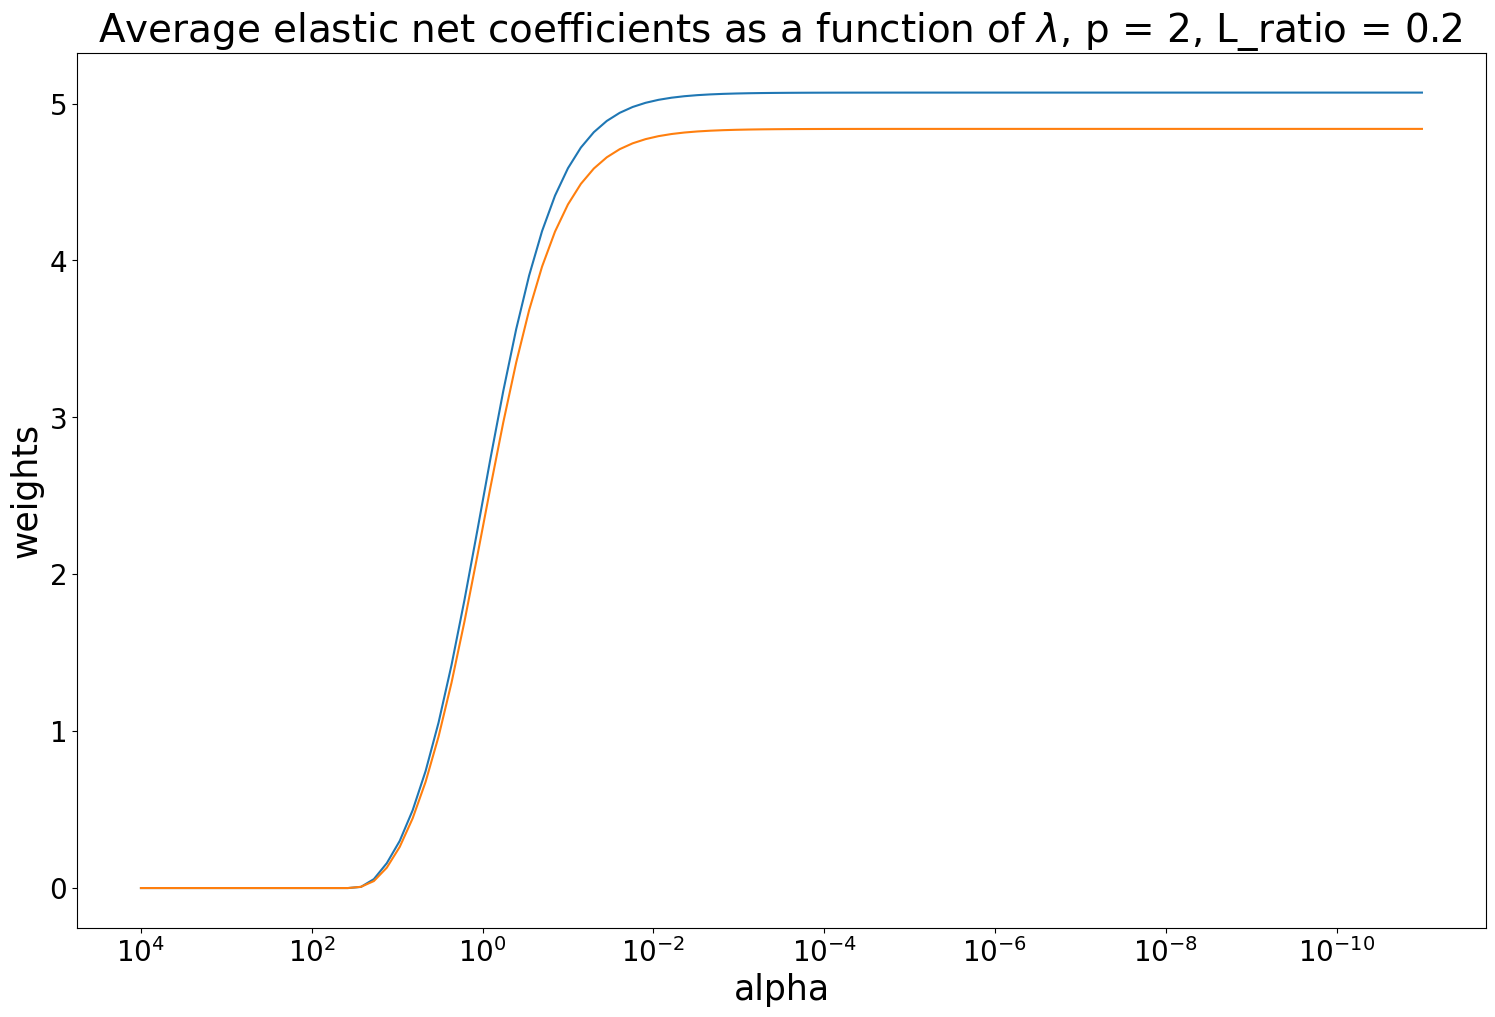

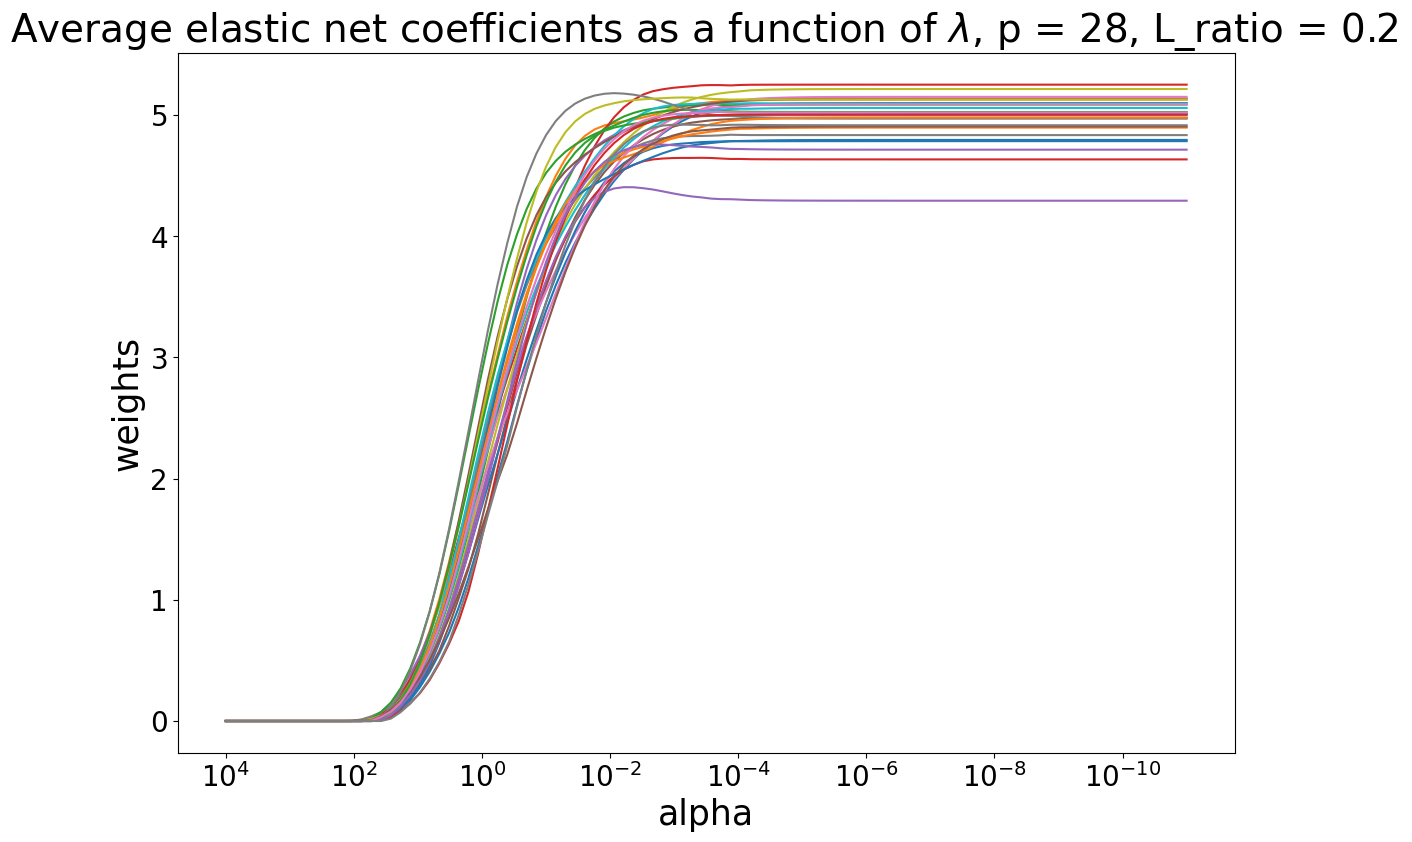

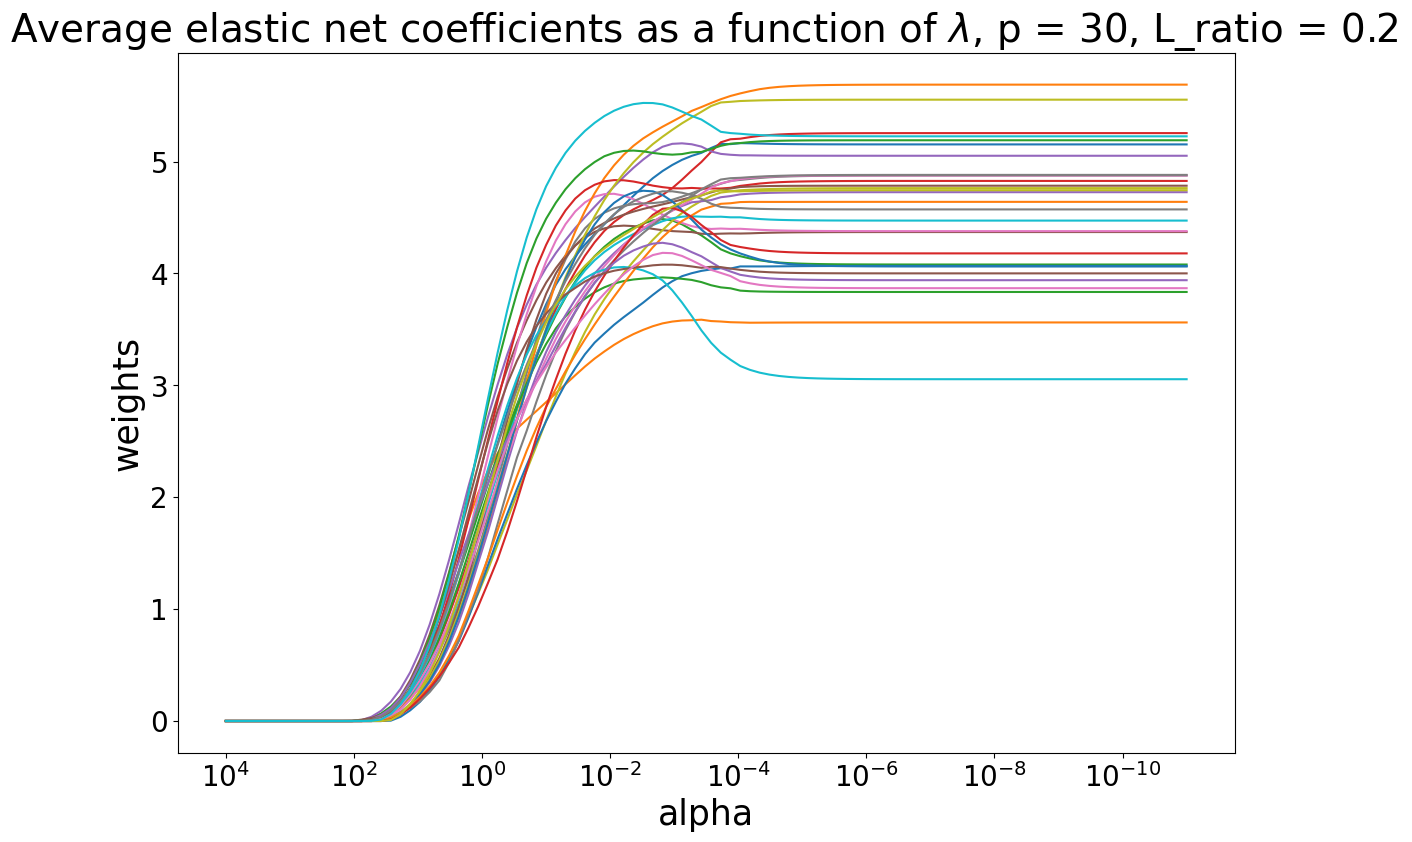

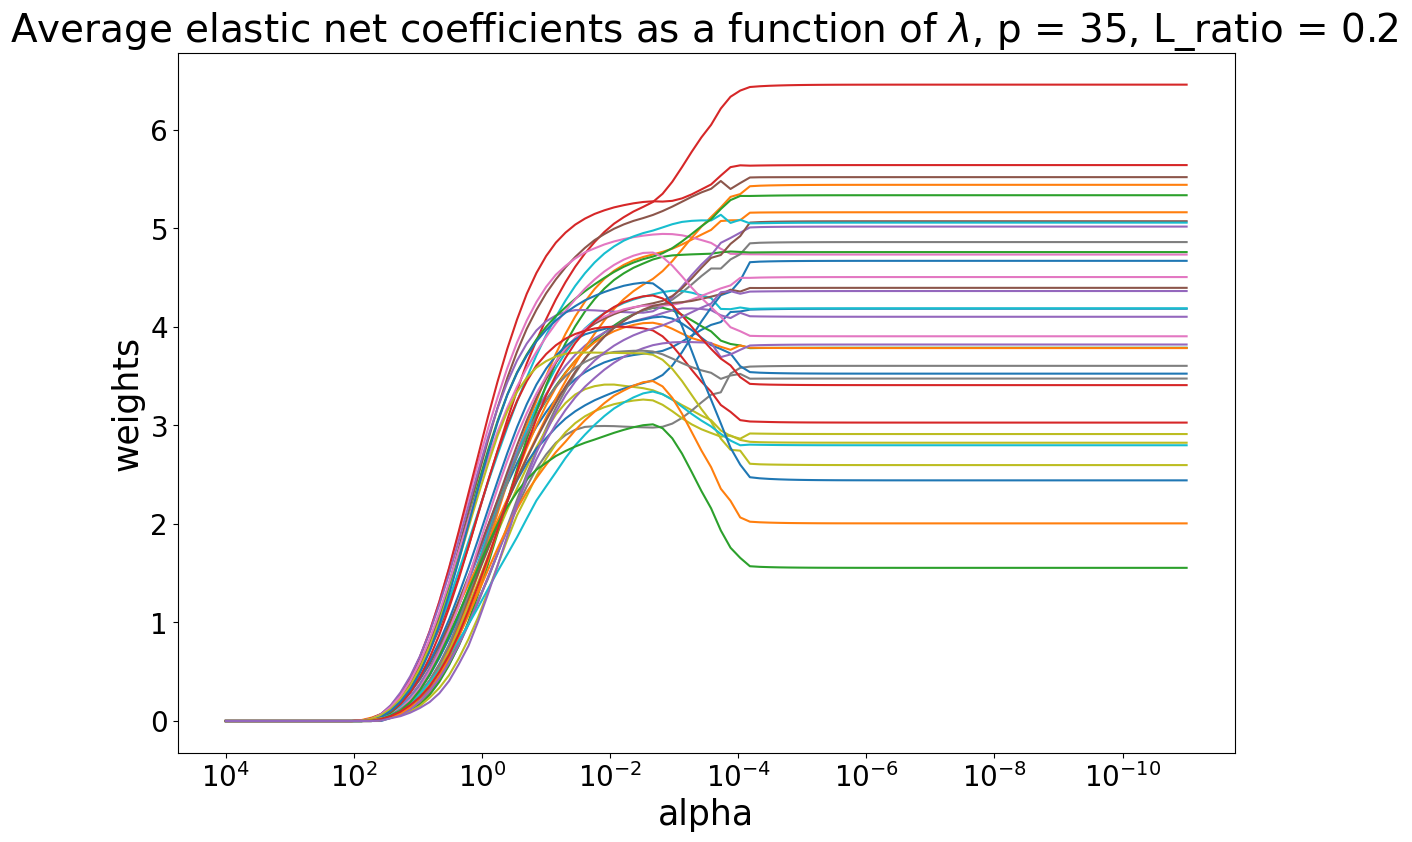

In [25]:
reg_type = "Average elastic net"
alphas_list = [alphas, alphas, alphas, alphas]
plot_average_betas(dfs_try_02, alphas_list,0.2, reg_type)

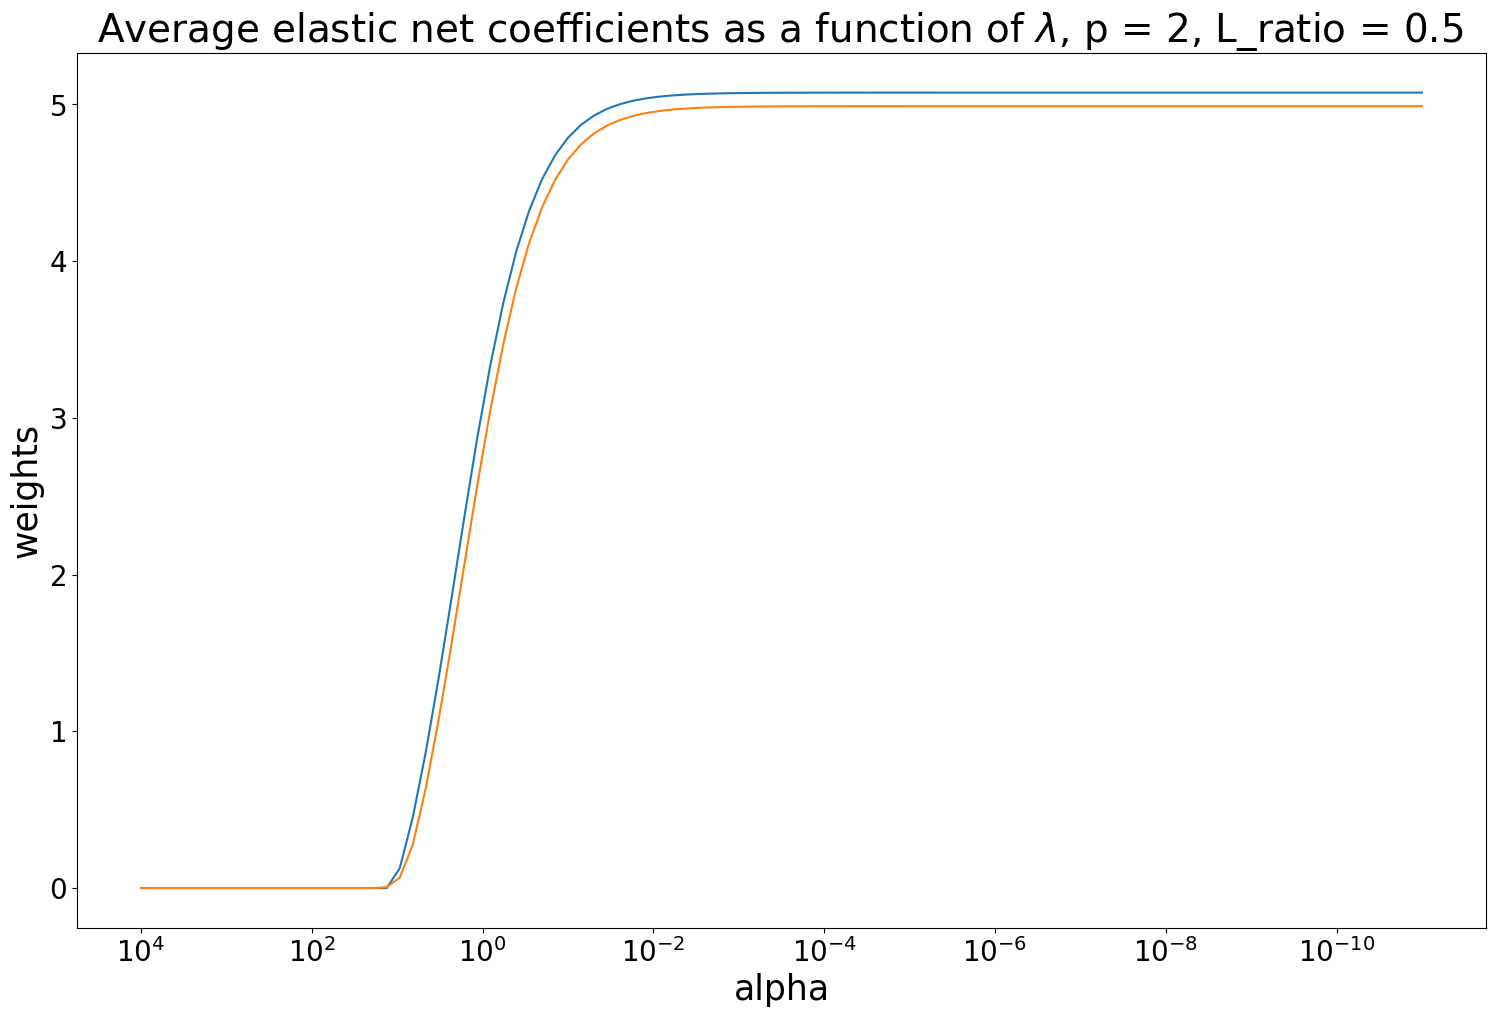

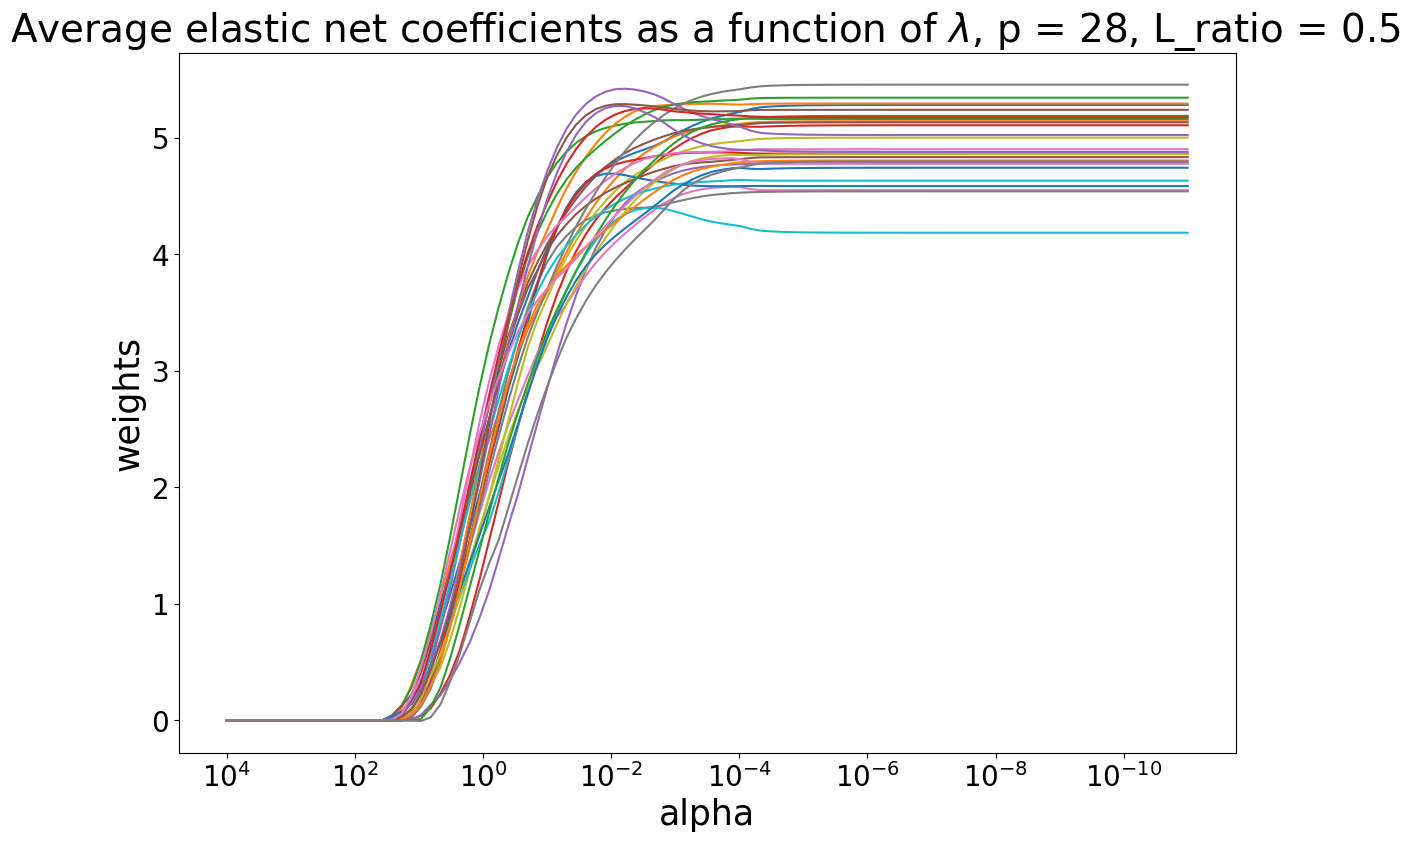

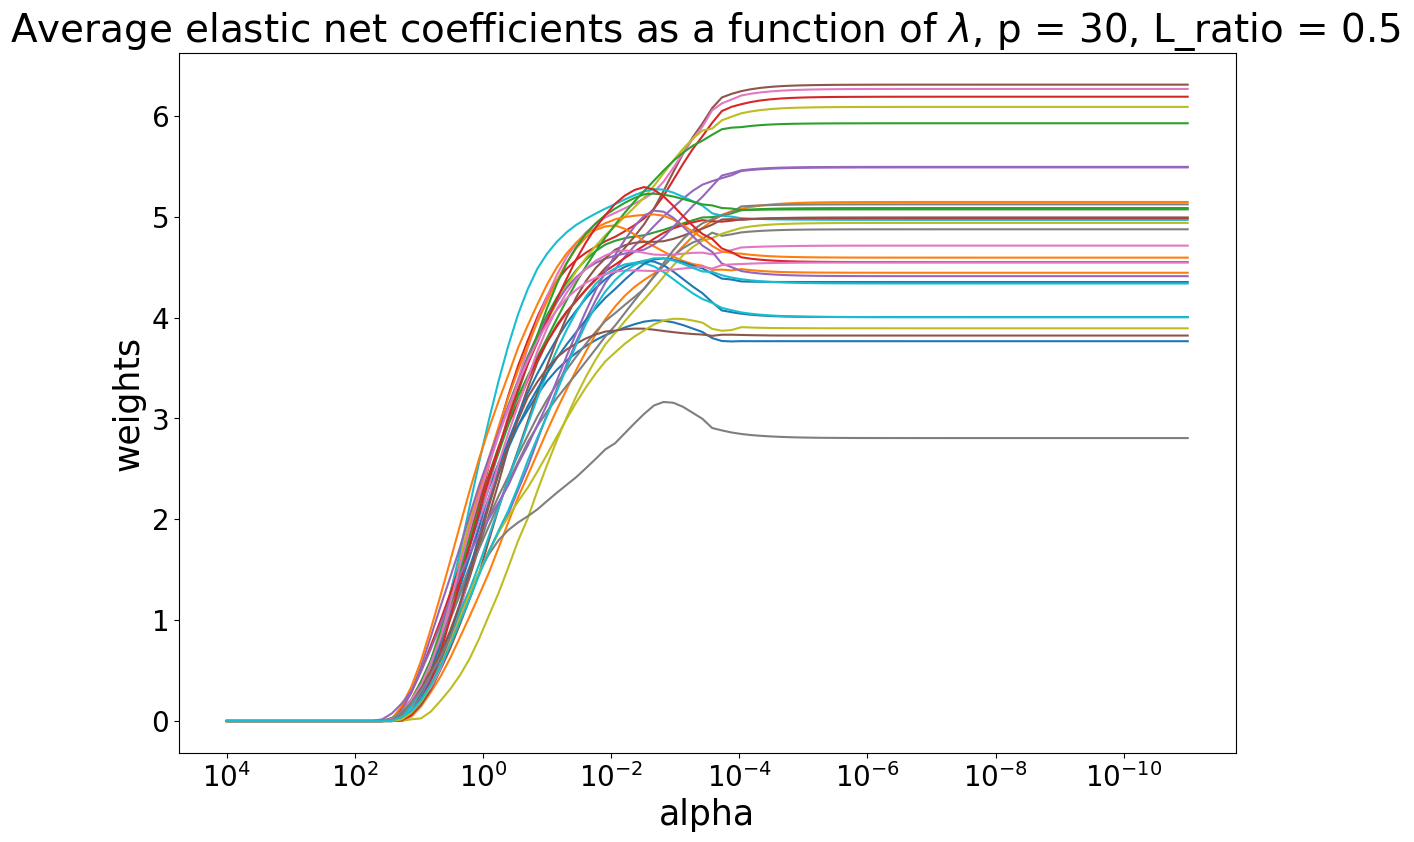

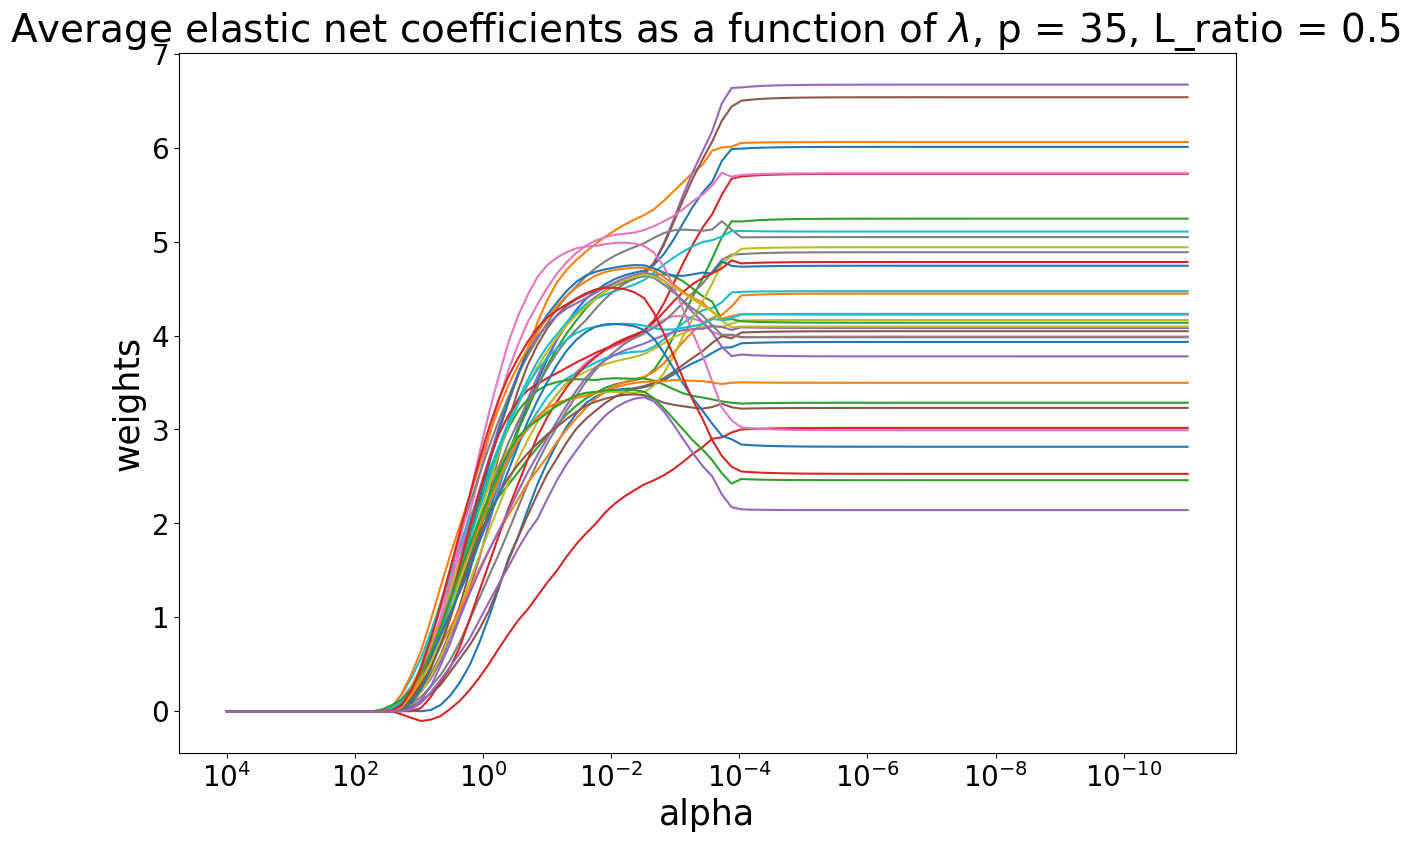

In [26]:
plot_average_betas(dfs_try_05, alphas_list,0.5, reg_type)

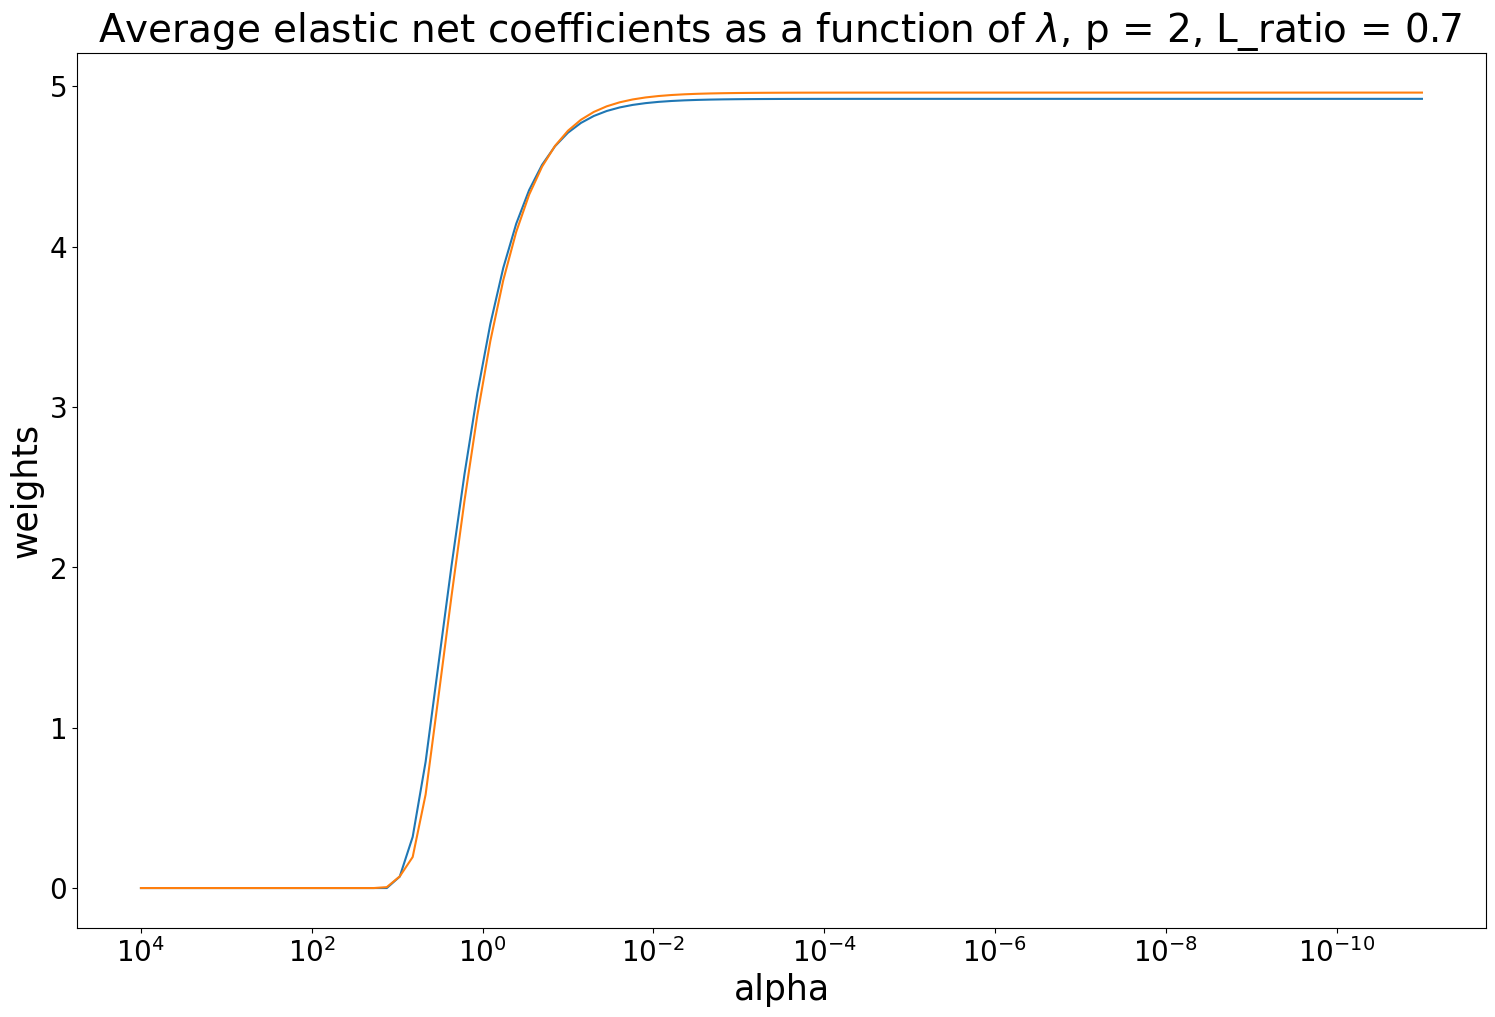

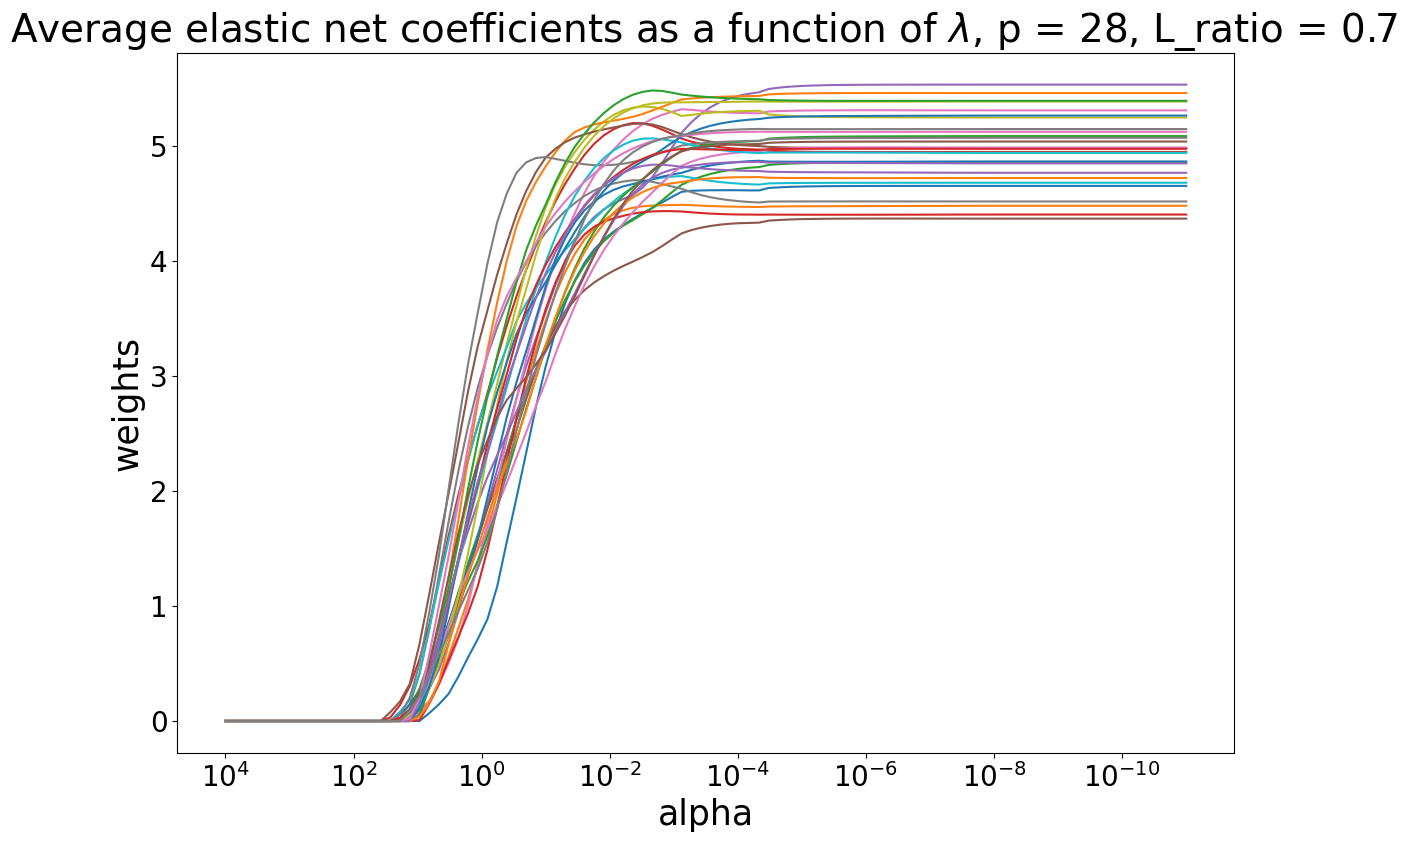

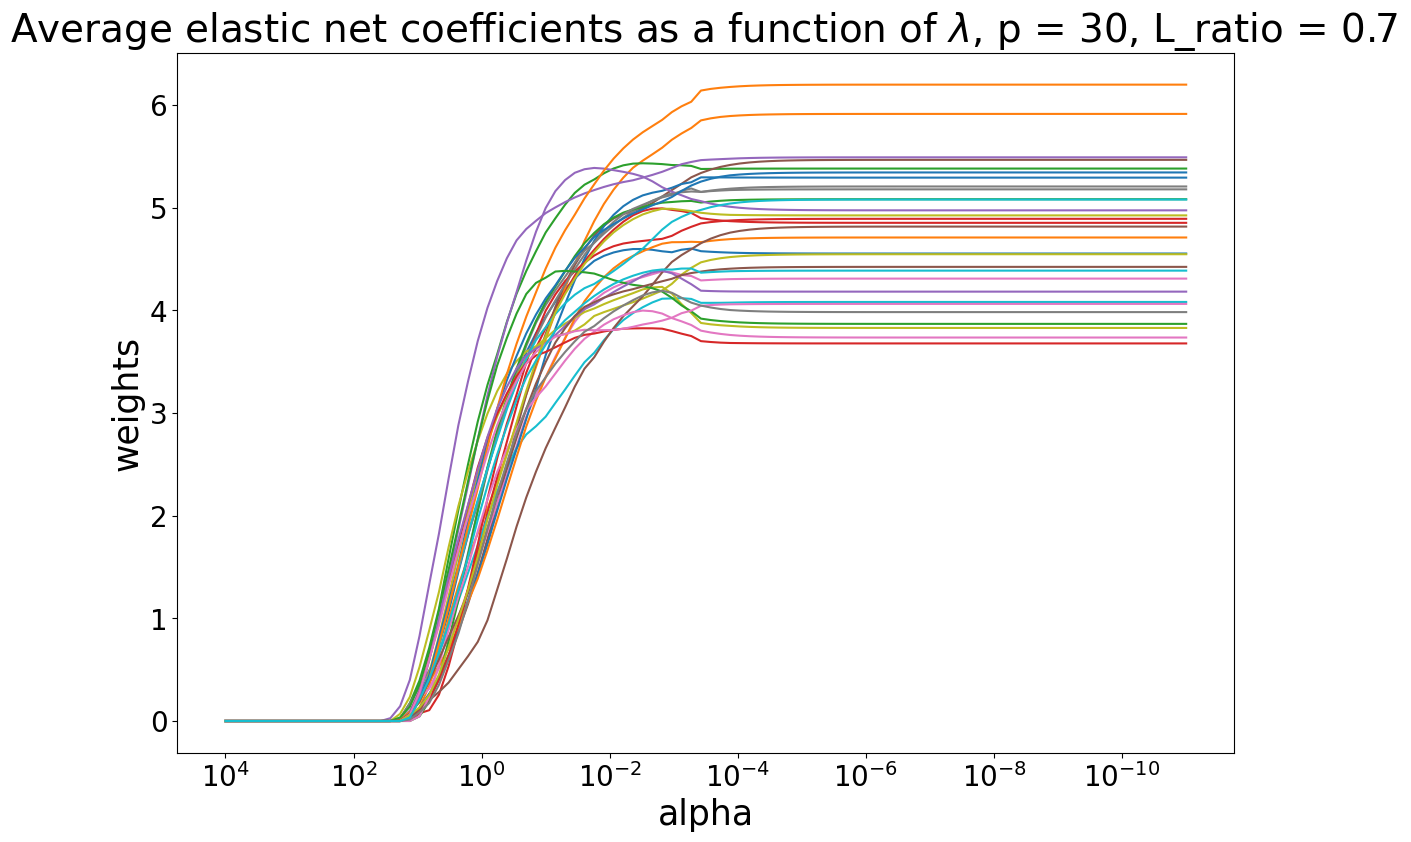

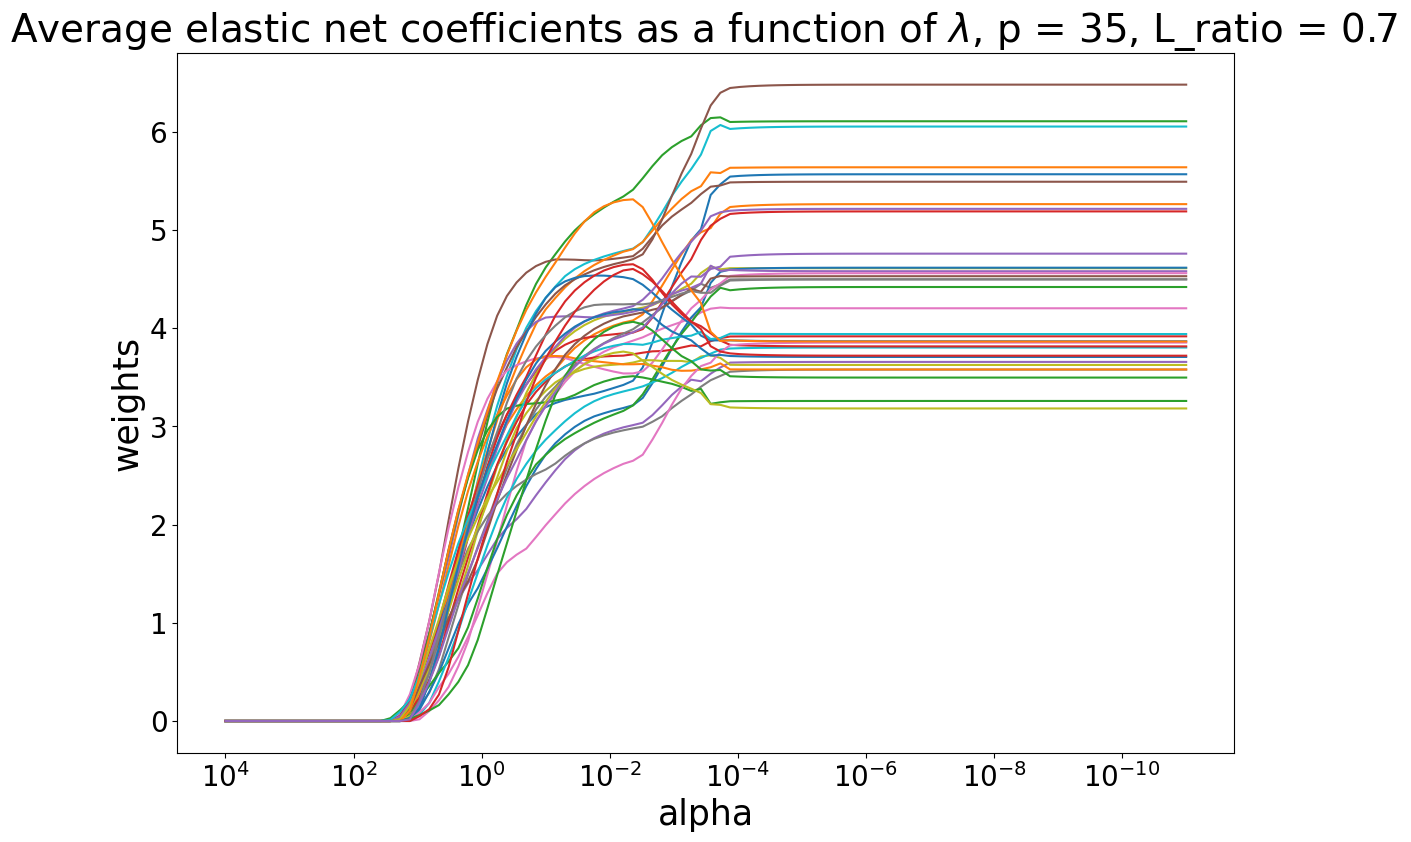

In [27]:
plot_average_betas(dfs_try_07, alphas_list,0.7, reg_type)

# IDEAL SCENARIO when there is grouped collinearity AND some true coeff are set to 0

In [108]:
"""setting up new betas for each p"""
regressors = [2, 28, 30, 36]
betas_final = []
for p in regressors:
    beta_first_half = np.array(np.repeat(0, (p/2)))
    beta_second_half = np.array(np.repeat(5, (p/2)))
    betas = np.concatenate([beta_first_half, beta_second_half])
    betas_final.append(betas)

In [109]:
betas_2=betas_final[0]
betas_28=betas_final[1]
betas_30=betas_final[2]
betas_36=betas_final[3]

In [92]:
#betas_final
#betas_36 = np.repeat(5,36)

In [93]:
def get_sim_data(n, p, q, min_cor, max_cor, true_betas):
    
    #p is the number of correlated regressors
    #q is the number of uncorrelated regressors
    #p+q= tot number of regressros
    
    sd_vec = np.ones(p) 
    mean = np.zeros(p)
    cor_matrix = np.zeros((p,p))

    correlation = np.random.uniform(min_cor, max_cor, int(p * (p - 1) / 2))
    cor_matrix[np.triu_indices(p, 1)] = correlation
    cor_matrix[np.tril_indices(p, -1)] = cor_matrix.T[np.tril_indices(p, -1)]
    np.fill_diagonal(cor_matrix, 1)


    D = np.diag(sd_vec)
    sigma = D.dot(cor_matrix).dot(D)

    X_corr = np.random.multivariate_normal(mean, sigma, n)
    if q>0:
        X_uncorr = np.random.multivariate_normal(np.zeros(q), np.identity(q), n)
        X = np.concatenate([X_corr, X_uncorr], axis=1) #X = pd.concat([X_corr, X_uncorr], axis=1)
    else:
        X = X_corr
        
    eps = np.random.normal(0, 1, n)

    y = X.dot(true_betas) + eps 
    
    y = pd.Series(y, name = "y")
    
    column_names = []
    
    for value in range(1, p+q + 1): 
        
        column = f"X_{value}"
        column_names.append(column)
        
    
    X = pd.DataFrame(X, columns = column_names)
    
    df = pd.concat([y, X], axis = 1)
    
    return y, X, df

In [94]:
def iterate_elnet(n, p, q, min_cor, max_cor, iterations_sim, true_betas, alphas, L_w):
    
    elnet_beta_names = []
    
    for value in range(1, p+q + 1): 
    
        column_betas = f"beta_{value}"
        elnet_beta_names.append(column_betas)

    df_list_betas_elnet = []

    for i in range(iterations_sim):
        
        true_betas_sim = true_betas
    
        y, X, df = get_sim_data(n, p, q, min_cor, max_cor, true_betas_sim) 
        matr_beta = []
        
        #for L_w in L_weight:
    
        for a in alphas: 
        
            elnet_model = ElasticNet(alpha=a, l1_ratio=L_w).fit(X,y)
            elnet_beta = np.array(elnet_model.coef_)
            matr_beta.append(elnet_beta)
            df_elnet_betas = pd.DataFrame(matr_beta, columns = elnet_beta_names)
        
         
        df_list_betas_elnet.append(df_elnet_betas)
        
    return df_list_betas_elnet

In [131]:
np.random.seed(200)

#p_regressors = [6]
#q= [30]
n = 30
min_cor = 0.4
max_cor = 0.8
iterations = 10
n_alphas = 100
alphas = np.logspace(-11, 4, n_alphas)
L_weight = [0,0.2,0.5,0.7, 1]

#collect_elnet_betas = []

#for L_w in L_weight:
#    for p in p_regressors: 
    
#        elnet_betas = iterate_elnet(n, p, min_cor, max_cor, iterations, np.repeat(5, p), alphas, L_w)
#        collect_elnet_betas.append(elnet_betas)

In [132]:
betas_36

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [37]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

feature        VIF
0      X_1   8.486750
1      X_2   4.215160
2      X_3   6.886986
3      X_4   8.453705
4      X_5  10.288973
5      X_6   4.386047
6      X_7   6.385975
7      X_8   4.495119
8      X_9   7.341472
9     X_10   7.435660
10    X_11  10.551701
11    X_12   7.226756
12    X_13   6.130704
13    X_14  16.836596
14    X_15   9.374532
15    X_16   4.696885
16    X_17  13.023805
17    X_18   5.759400
18    X_19   9.200669
19    X_20   5.380549
20    X_21   5.877189
21    X_22   4.613680
22    X_23   3.995008
23    X_24   6.996463
24    X_25   8.552019
25    X_26   9.954607
26    X_27   7.969501
27    X_28  20.534067
28    X_29   6.891230
29    X_30  11.847902
30    X_31   1.735056
31    X_32   1.533870
32    X_33   1.781550
33    X_34   1.390941
34    X_35   1.277123
35    X_36   1.854186

In [133]:
iterations_sim = 10
intermediate_results = []
mean_df_list_betas_elnet_36 = []
for i,L_w in enumerate(L_weight):
    df_list_betas_elnet_36 = iterate_elnet(30, 32 , 4, min_cor, max_cor, iterations_sim, betas_36, alphas, L_w)
    intermediate_results.append(df_list_betas_elnet_36)
    
    mean_df_list_betas = reduce(lambda x, y: x.add(y, fill_value = 0), intermediate_results[i]) / iterations_sim
    mean_df_list_betas_elnet_36.append(mean_df_list_betas)

    mean_df_list_betas_elnet_36[i]["alpha"] = alphas
    mean_df_list_betas_elnet_36[i].set_index("alpha", inplace = True)
mean_df_list_betas_elnet_36

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.033003554846359, tolerance: 4.518391963592529
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.36872985510837, tolerance: 4.518391963592529
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.535736458989223, tolerance: 4.518391963592529
  m

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17899.892532269212, tolerance: 4.518391963592529
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19038.543644094578, tolerance: 4.518391963592529
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19947.504022900965, tolerance: 4.518391963592529
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614.451837862532, tolerance: 4.923243199850027
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835.8651624754249, tolerance: 4.923243199850027
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130.3888096576136, tolerance: 4.923243199850027
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24524.607074162257, tolerance: 4.923243199850027
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24551.510571627885, tolerance: 4.923243199850027
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24570.529126246754, tolerance: 4.923243199850027
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6313.219720499515, tolerance: 7.1555242675742345
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8049.993717080979, tolerance: 7.1555242675742345
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10137.693257575083, tolerance: 7.1555242675742345
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.57286355992088, tolerance: 7.575807836718995
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.54844633068805, tolerance: 7.575807836718995
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.66847278182885, tolerance: 7.575807836718995
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37476.859612700384, tolerance: 7.575807836718995
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37594.33079712924, tolerance: 7.575807836718995
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37677.69306049057, tolerance: 7.575807836718995
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4748.129556197483, tolerance: 5.7043375948617685
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6059.376693759741, tolerance: 5.7043375948617685
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7650.009494380025, tolerance: 5.7043375948617685
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.82811005147806, tolerance: 8.537582408719498
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.82213468080397, tolerance: 8.537582408719498
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276.77463898635233, tolerance: 8.537582408719498
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42156.43061039876, tolerance: 8.537582408719498
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42311.4849877975, tolerance: 8.537582408719498
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42421.60989802618, tolerance: 8.537582408719498
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5094.205370681977, tolerance: 9.581105148914329
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6618.776032634576, tolerance: 9.581105148914329
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8547.352523762653, tolerance: 9.581105148914329
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.29713663220159, tolerance: 7.097952375897023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.9897534221353, tolerance: 7.097952375897023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.0042759104697, tolerance: 7.097952375897023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34970.527734078525, tolerance: 7.097952375897023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35121.76170220394, tolerance: 7.097952375897023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35229.296847292215, tolerance: 7.097952375897023
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11391.773255567052, tolerance: 10.95035902105172
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14454.39147866465, tolerance: 10.95035902105172
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18090.463579304924, tolerance: 10.95035902105172
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.16733347307436, tolerance: 8.376941670522182
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.71374842518782, tolerance: 8.376941670522182
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.00554533349893, tolerance: 8.376941670522182
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41250.66001910082, tolerance: 8.376941670522182
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41435.25815452695, tolerance: 8.376941670522182
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41566.555450547814, tolerance: 8.376941670522182
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.991282707187683, tolerance: 13.151140351280148
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.541964319928898, tolerance: 13.151140351280148
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.338829225138838, tolerance: 13.151140351280

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.91788498805789, tolerance: 9.002335125652666
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.173098380840942, tolerance: 9.002335125652666
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.348055701696461, tolerance: 9.002335125652666
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.73140521338806, tolerance: 6.5753365225073654
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.584536596736413, tolerance: 6.5753365225073654
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.440870237038267, tolerance: 6.5753365225073654
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.504428695843856, tolerance: 11.602829167236537
  model = cd_fast.enet_coordinate_descent(
<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.67438894218027, tolerance: 8.673183264067681
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.91800371173005, tolerance: 8.673183264067681
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.06316639792575, tolerance: 9.939896039335052
  model = cd_fast.enet_coordinate_descent(
<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.284102726635437, tolerance: 10.118679918176767
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.311114443369693, tolerance: 10.11867991817676

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.478303751431543, tolerance: 10.39750879634403
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.219819907723569, tolerance: 10.39750879634403
  model = cd_fast.enet_coordinate_descent(
<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.630601306020807, tolerance: 9.519898837075637
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.92524536715336, tolerance: 9.519898837075637
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.122329501767203, tolerance: 9.519898837075637
 

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.34761344157286, tolerance: 6.94106351121087
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.465535516803708, tolerance: 6.94106351121087
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.752990966412069, tolerance: 6.94106351121087
  mod

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.831209342233576, tolerance: 12.195793555634307
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.463590377882653, tolerance: 12.195793555634307
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.50108760701059, tolerance: 12.1957935556343

[                beta_1    beta_2    beta_3    beta_4    beta_5    beta_6  \
 alpha                                                                      
 1.000000e-11  8.671848  6.641928  6.281183  2.342433  4.675960  3.228713   
 1.417474e-11  8.671848  6.641928  6.281183  2.342433  4.675960  3.228713   
 2.009233e-11  8.671848  6.641928  6.281183  2.342433  4.675960  3.228713   
 2.848036e-11  8.671848  6.641928  6.281183  2.342433  4.675960  3.228713   
 4.037017e-11  8.671848  6.641928  6.281183  2.342433  4.675960  3.228713   
 ...                ...       ...       ...       ...       ...       ...   
 2.477076e+03  0.013242  0.012083  0.013082  0.011825  0.013315  0.011243   
 3.511192e+03  0.009361  0.008541  0.009246  0.008359  0.009412  0.007948   
 4.977024e+03  0.006613  0.006034  0.006532  0.005905  0.006650  0.005616   
 7.054802e+03  0.004670  0.004261  0.004612  0.004170  0.004696  0.003966   
 1.000000e+04  0.003297  0.003009  0.003256  0.002944  0.003315  0.002800   

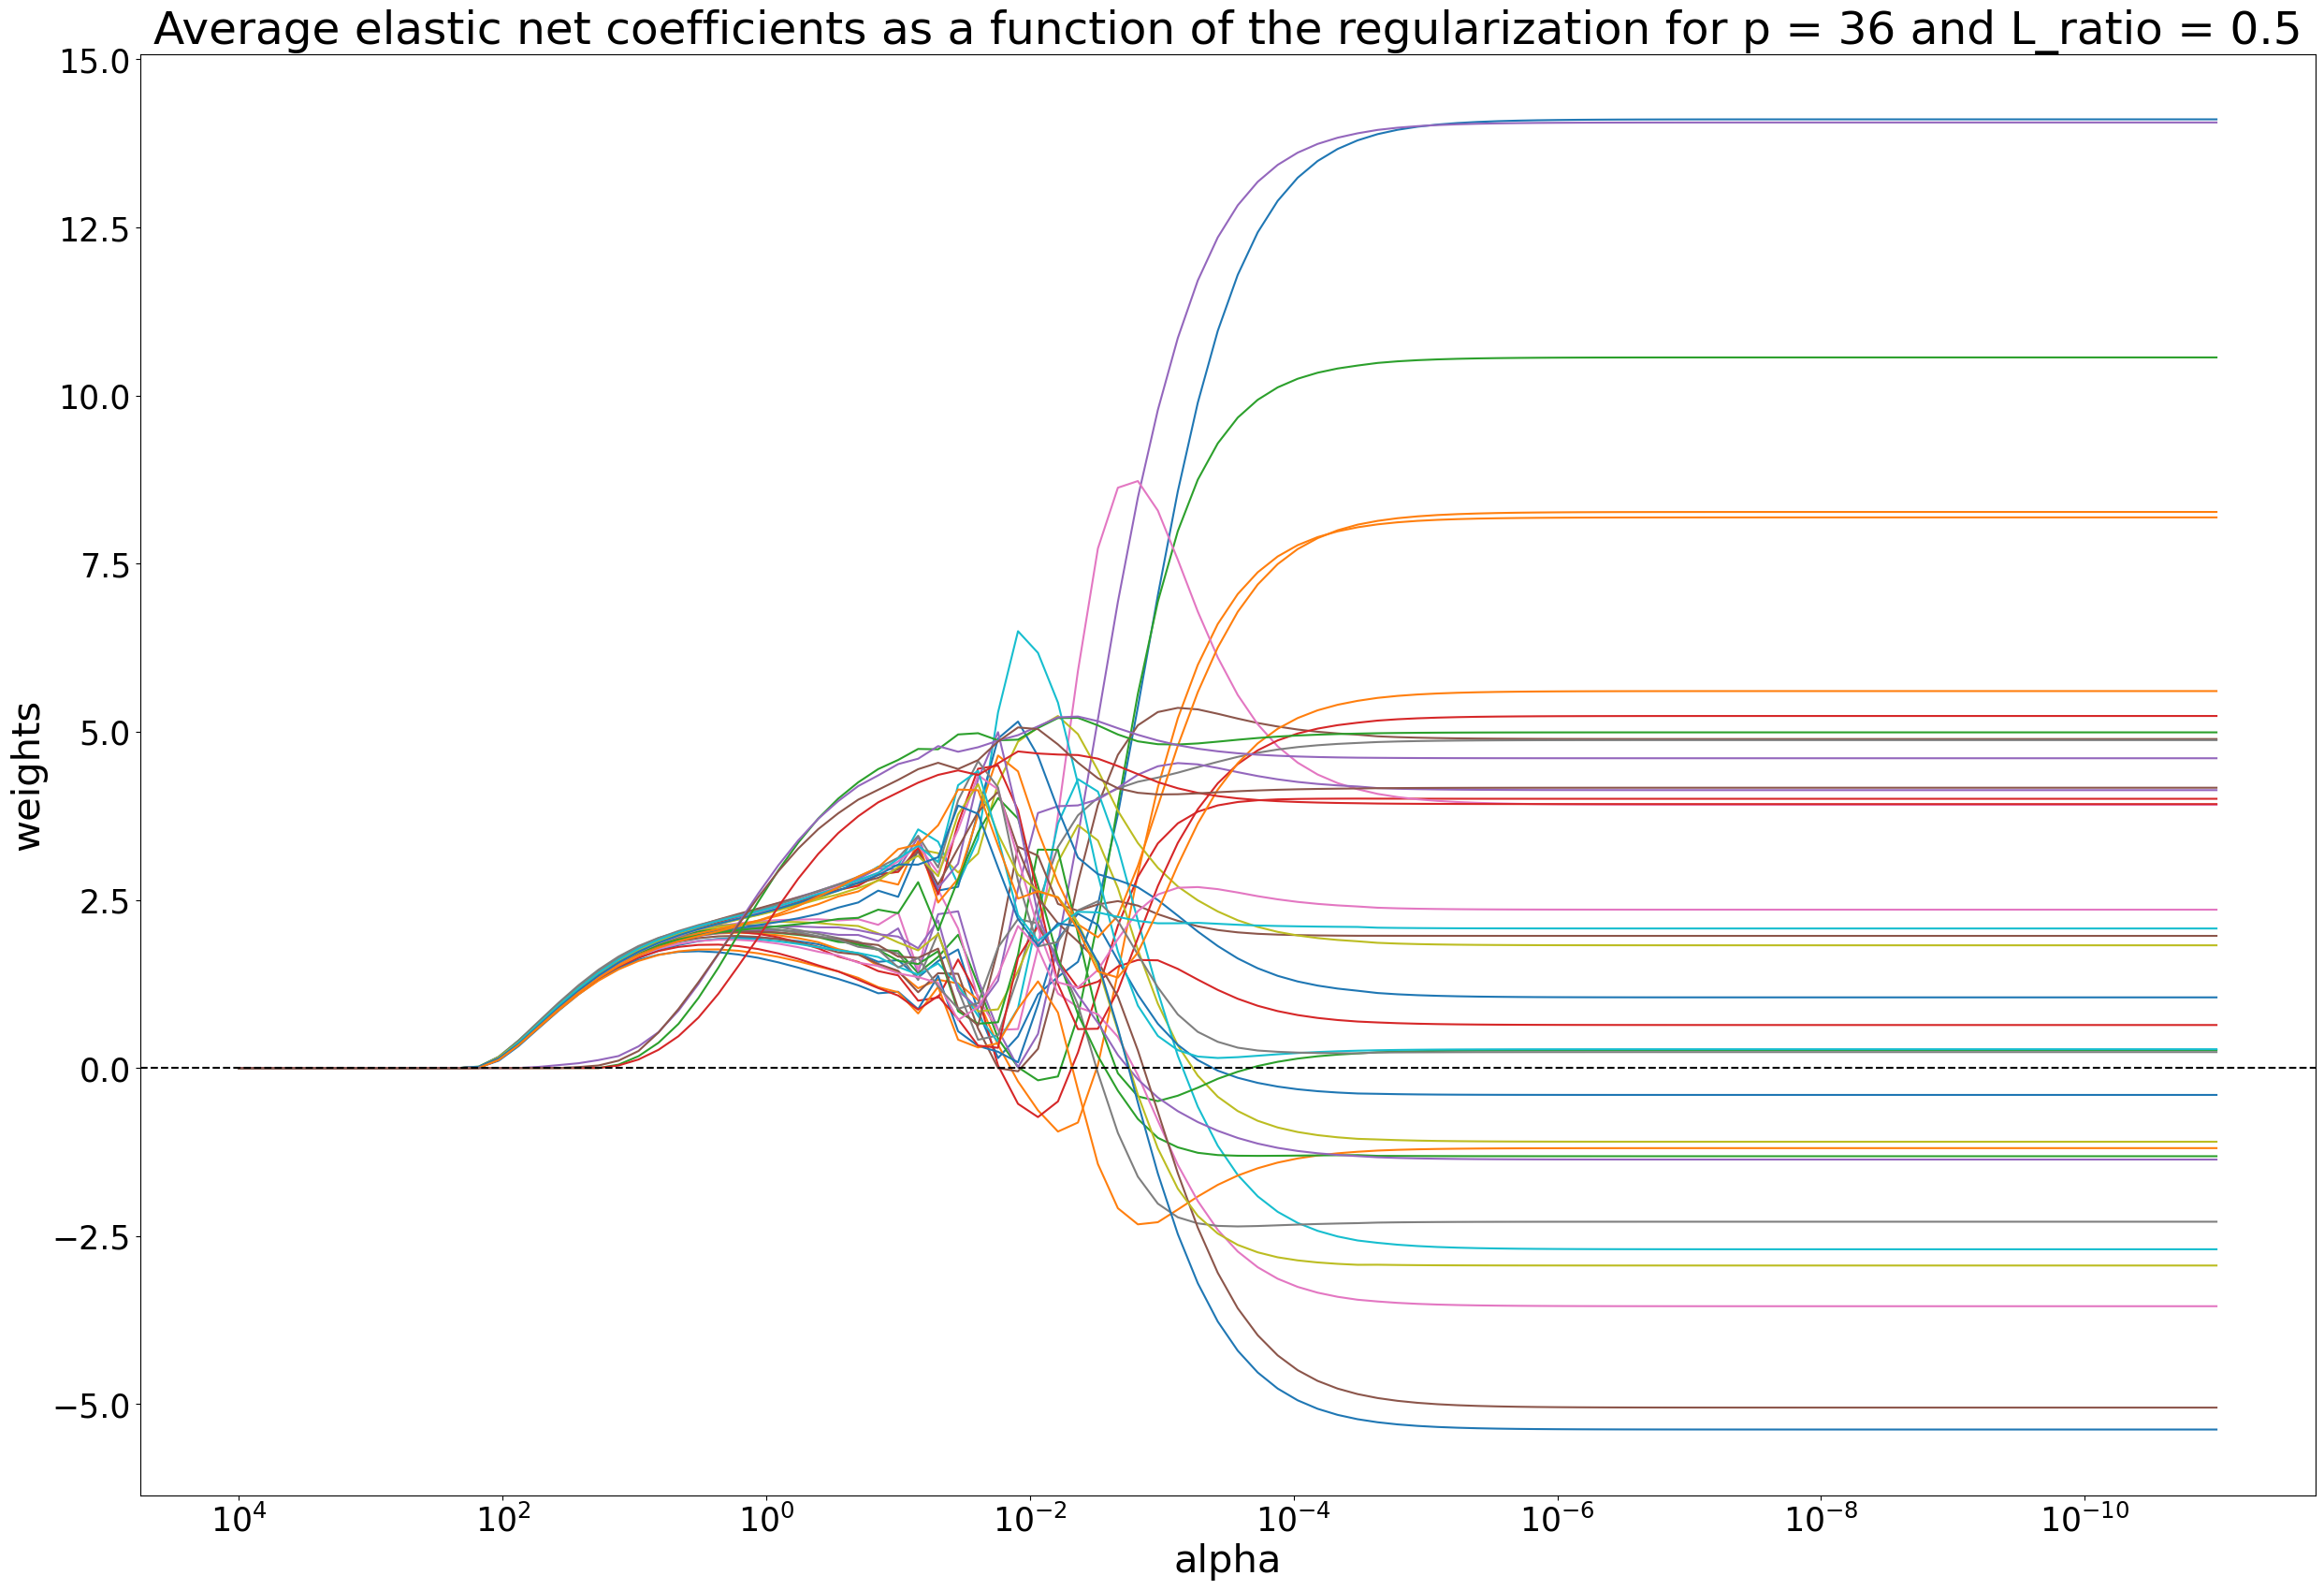

In [113]:
plot_mean_shrinkaged_estimates(mean_df_list_betas_elnet_36[2], "Average elastic net coefficients as a function of the regularization for p = 36 and L_ratio = 0.5")

In [114]:
def get_elnet_var_distribution(df, iterations, alpha_low, alpha_med, alpha_high):


    betas_low_alpha = []
    betas_med_alpha = []
    betas_high_alpha = []

    for i in list(range(iterations)): 

        betas_low_a = np.array(df[i].iloc[alpha_low, :])
        betas_med_a = np.array(df[i].iloc[alpha_med, :])
        betas_high_a = np.array(df[i].iloc[alpha_high, :])
    
        betas_low_alpha.append(betas_low_a)
        betas_med_alpha.append(betas_med_a)
        betas_high_alpha.append(betas_high_a)
    
        df_low_a = pd.DataFrame(betas_low_alpha)
        df_med_a = pd.DataFrame(betas_med_alpha)
        df_high_a = pd.DataFrame(betas_high_alpha)
        
    
    return df_low_a, df_med_a, df_high_a

In [127]:
def plot_elnet_beta_distribution(df_low, df_med, df_high): 

    sns.set(style="white", palette="muted", color_codes=True)
    #rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(1, 3, figsize=(18, 8))
    # sns.despine(left=True)

    fig_1=sns.kdeplot(data=df_low, ax=axes[0])
    fig_1.legend([],[], frameon=False)
    fig_1.title.set_text(f"Distribution of elastic net coefficients for low $\lambda$, p = {df_low.shape[1]}")

    fig_2=sns.kdeplot(data=df_med, ax=axes[1])
    fig_2.legend([],[], frameon=False)
    fig_2.title.set_text(f"Distribution of elastic net coefficients for moderate $\lambda$, p = {df_med.shape[1]}")

    fig_3=sns.kdeplot(data=df_high, ax=axes[2])
    fig_3.legend([],[], frameon=False)
    fig_3.title.set_text(f"Distribution of elastic net coefficients for high $\lambda$, p = {df_high.shape[1]}")
    plt.show()

In [134]:
df_list_betas_elnet_2 = iterate_elnet(30, 1 , 1, min_cor, max_cor, iterations_sim, betas_2, alphas, 0.5)
df_list_betas_elnet_36 = iterate_elnet(30, 32 , 4, min_cor, max_cor, iterations_sim, betas_36, alphas, 0.5)

<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.41110340863433, tolerance: 7.584229942634717
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.843041360175935, tolerance: 7.584229942634717
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.121054131823943, tolerance: 7.584229942634717
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.558767838738877, tolerance: 10.507761152145095
  model = cd_fast.enet_coordinate_descent(
<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.85818620806954, tolerance: 9.224195028399231
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.343401499065253, tolerance: 9.224195028399231


<ipython-input-93-5ef9b8dd4bf8>:20: RuntimeWarning: covariance is not positive-semidefinite.
  X_corr = np.random.multivariate_normal(mean, sigma, n)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.42924471231515, tolerance: 8.96429063949923
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.195039058672506, tolerance: 8.96429063949923
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.421098417524863, tolerance: 8.96429063949923
  mo

In [135]:
df_low_a_2, df_med_a_2, df_high_a_2 = get_elnet_var_distribution(df_list_betas_elnet_2, iterations_sim, 10, 40, 70)
df_low_a_36, df_med_a_36, df_high_a_36 = get_elnet_var_distribution(df_list_betas_elnet_36, iterations_sim, 10, 40, 70)

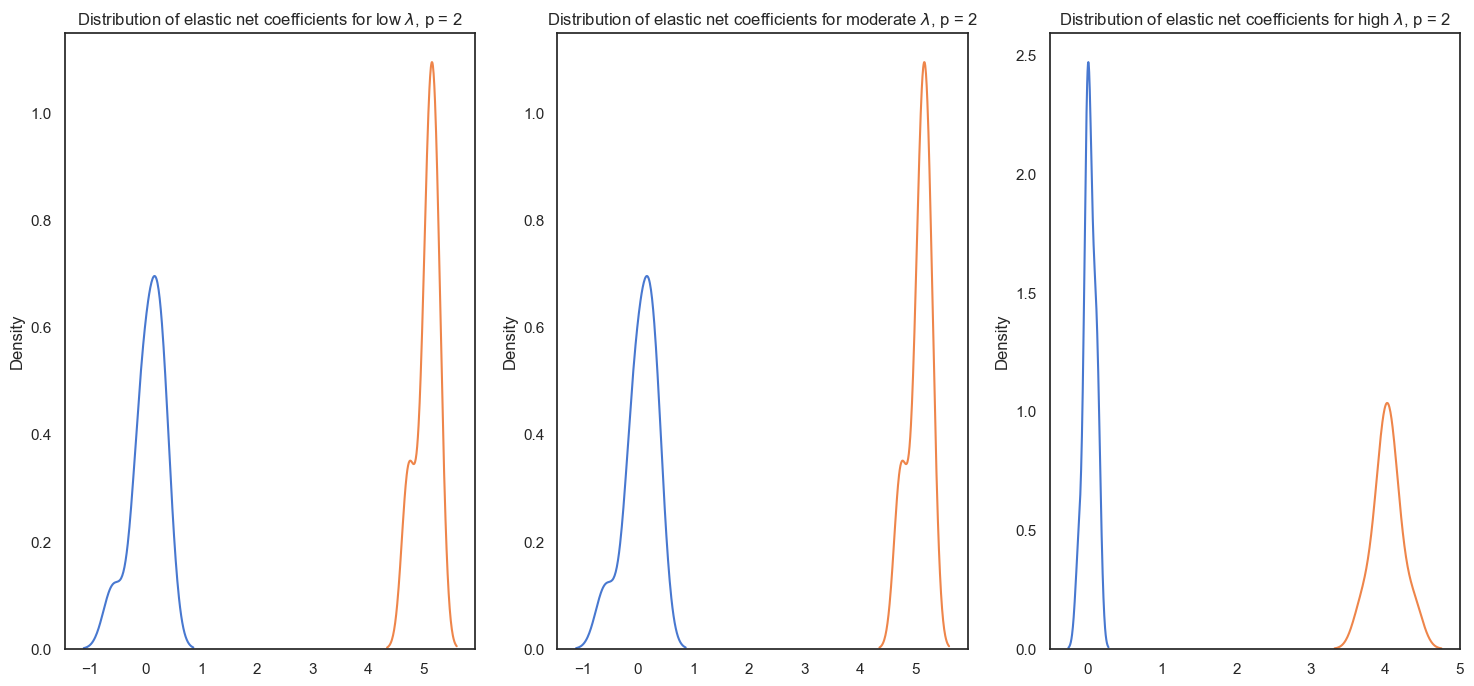

In [130]:
plot_elnet_beta_distribution(df_low_a_2, df_med_a_2, df_high_a_2)

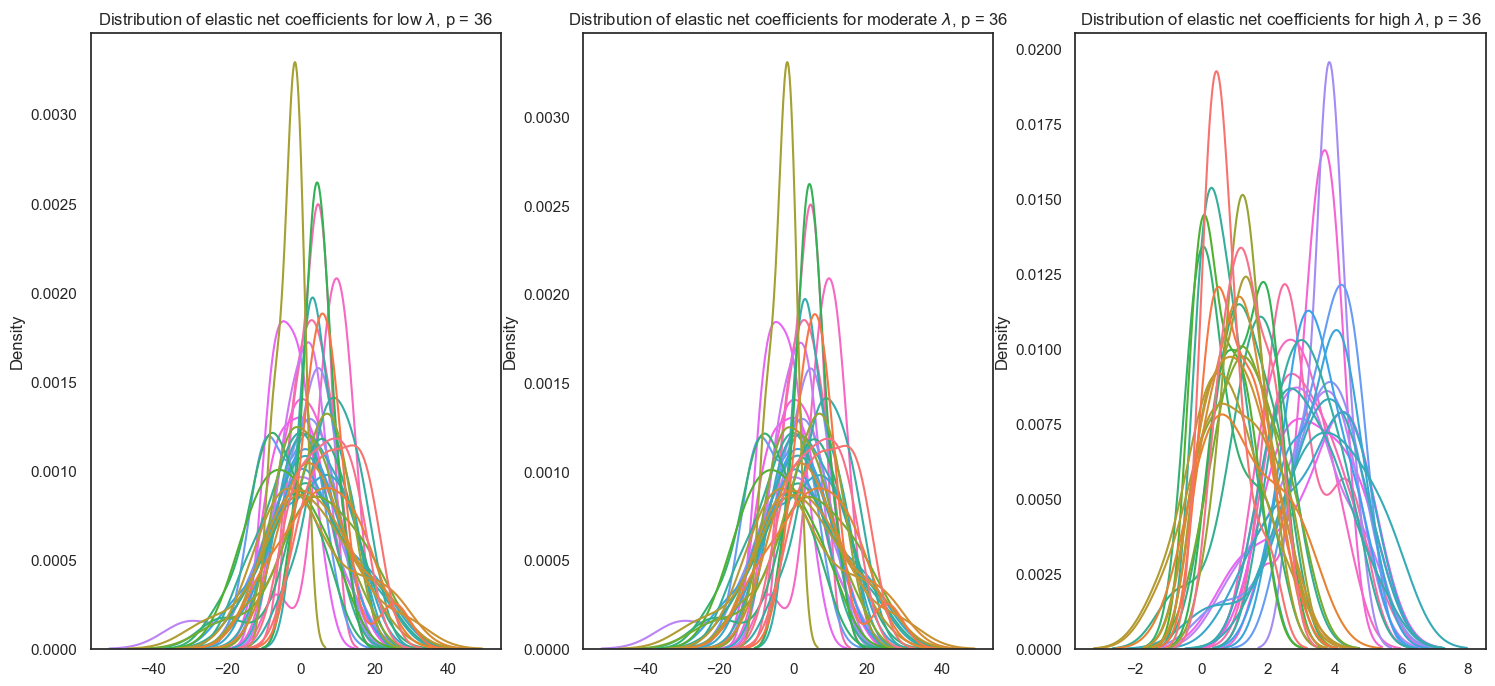

In [136]:
plot_elnet_beta_distribution(df_low_a_36, df_med_a_36, df_high_a_36)